----

# <p style='text-align: center;'> BFSI Credit Risk Assignment </p>
----

### <font color = blue> <p style='text-align: center;'> Submitted by </p>
<font color = blue> <p style='text-align: center;'> Abhishek Kare </p>
<font color = blue> <p style='text-align: center;'> Mallika Gollapalli </p>
    
----

## Problem Statement ##

In the recent times, number of credit card fraud transactions are increasing and the banking industry facing huge challenge in protecting the customers' trust and maintain the credibility .
With increase in the digital payments there is also increase in the fraudulent activity.
Credit card fraud can be performed in different ways like 
Skimming of cards
Manipulation of genuine cards
Stolen or lost credit cards
Fradulent relemarketing
Detecting the fraud transactions using machine learning techniques is quite important to prevent fraudulent activities. It is a necessity for the banks.

<br>
In order to deploy a proactive monitoring system, goal is to build a machine learning model using the historical transactions.
<br>





## Steps to follow
1. Data Loading and understanding
2. Data cleaning - includes missing value treatment, outlier treatments, removing unwanted columns, create new columns , binning, grouping etc
3. EDA - Data exploration using univariate , bivariate analysis
4. Data Preparation for modelling
5. Data Modeling
6. Data evaluation
7. Perform evaluation on the Unseen Data.
8. Predict results and analysis


In [135]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler


from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFECV, RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


#Change Display Area
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
pd.options.display.max_colwidth = 250

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [136]:
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/My Drive/fraudTrain.csv")

#  Data Loading and understanding

In [137]:
# Reading the dataset
df = pd.read_csv("C:\\Users\\Abhishek Kare\\Downloads\\archive (2)\\fraudTrain.csv")
# df = pd.read_csv("fraudTrain.csv")

In [138]:
# Printing the top 5 rows
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [139]:
# Printing the last 5 rows
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,MT,59871,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [140]:
# Printing the shape of the dataset
df.shape

(1296675, 23)

In [141]:
df.size

29823525

In [142]:
# Getting the info of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

- Dataset contains 22 columns and 1296675 rows of data. Out of which:

    <br>
   
    - FLOAT datatype are 5 columns
    <br>
    
    - INT datatype are 6 columns
    <br>
    
    - OBJECT datatype are 12 columns

# Data Cleaning



## Check for Missing Values

In [143]:
# Checking for Null values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

- Insights:- There are no missing values in the provided dataset

In [144]:
# Getting the description of all the numeric columns
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


- Insights:- All the Numerical values are listed

In [145]:
# Value count of 'is_fraud' column
df['is_fraud'].value_counts(normalize=True)

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

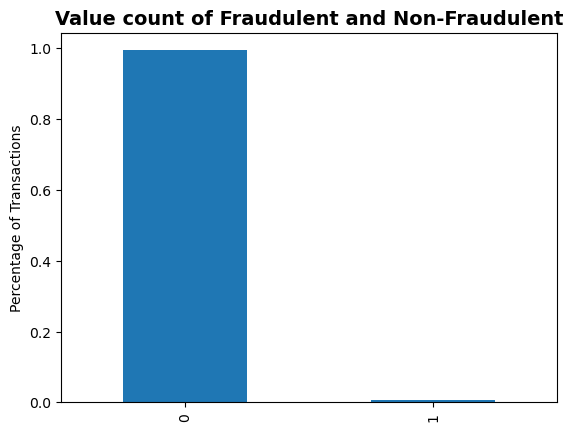

In [146]:
# Barplot of 'is_fraud' column
df['is_fraud'].value_counts(normalize=True).plot(kind='bar')

plt.title('Value count of Fraudulent and Non-Fraudulent', fontweight='bold', fontsize=14)

plt.ylabel('Percentage of Transactions')

plt.show()

- Majority of the data is not fradulent transactions.There is imbalanced data that would be handled in model building


In [147]:
# Value count of 'Category' column
df['category'].value_counts(normalize=True)

gas_transport     0.101536
grocery_pos       0.095350
home              0.094947
shopping_pos      0.089978
kids_pets         0.087173
shopping_net      0.075225
entertainment     0.072504
food_dining       0.070535
personal_care     0.069993
health_fitness    0.066230
misc_pos          0.061430
misc_net          0.048807
grocery_net       0.035053
travel            0.031239
Name: category, dtype: float64

- Credit card transactions are categorized as above categories. Majority of transactions are for transport, grocery, home, shopping and so on ..

In [148]:
# Value count of 'Gender' column
df['gender'].value_counts(normalize=True)

F    0.547449
M    0.452551
Name: gender, dtype: float64

- Female have used credit card 54% compared to Male at 45%

In [149]:
# Value count of 'state' column
df['state'].value_counts(normalize=True)

TX    0.073169
NY    0.064396
PA    0.061578
CA    0.043465
OH    0.035846
MI    0.035594
IL    0.033356
FL    0.032908
AL    0.031611
MO    0.029617
MN    0.024458
AR    0.024005
NC    0.023341
WI    0.022649
VA    0.022558
SC    0.022511
KY    0.021960
IN    0.021270
IA    0.020811
OK    0.020569
MD    0.020200
GA    0.020100
WV    0.019813
NJ    0.018974
NE    0.018638
KS    0.017735
MS    0.016340
LA    0.016168
WY    0.014901
WA    0.014594
OR    0.014342
TN    0.013538
ME    0.012729
NM    0.012653
ND    0.011403
CO    0.010704
MA    0.009544
SD    0.009504
VT    0.009076
MT    0.009065
AZ    0.008306
UT    0.008251
NH    0.006384
CT    0.005940
NV    0.004324
ID    0.004276
DC    0.002786
HI    0.001974
AK    0.001635
RI    0.000424
DE    0.000007
Name: state, dtype: float64

- Credit card transactions are spread across many states. Merge or group them to reduce the unique data

In [150]:
# Creating a function to segregate state into regions
def Group_Region (state):
    if state['state'] in ['CT','ME','MA','NH','NJ','NY','PA','RI','VT']:
        return 'Northeast'
    if state['state'] in ['IL','IN','IA','KS','MI','MN','MO','NE','ND','OH','SD','WI']:
        return 'Midwest'
    if state['state'] in ['AL','AR','DE','DC','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','Tx','VA','WV']:
        return 'South'
    else:
        return 'West'

In [151]:
# Segregating state into respective regions
df['Region'] = df.apply(lambda row: Group_Region(row), axis=1)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Region
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,South
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,West
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,West
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,West
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,South


In [152]:
# Description of 'job' column
df['job'].describe()

count               1296675
unique                  494
top       Film/video editor
freq                   9779
Name: job, dtype: object

- There are 494 unique Job values. Data is skewed and this cannot be taken as is for Model building or EDA. Data will be grouped based on the type of Job values

In [153]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [154]:
# Value count of 'job' column
df.job.value_counts(normalize=True)

Film/video editor                                              0.007542
Exhibition designer                                            0.007094
Naval architect                                                0.006697
Surveyor, land/geomatics                                       0.006694
Materials engineer                                             0.006378
Designer, ceramics/pottery                                     0.006343
Systems developer                                              0.005938
IT trainer                                                     0.005922
Financial adviser                                              0.005907
Environmental consultant                                       0.005820
Chartered public finance accountant                            0.005560
Scientist, audiological                                        0.005533
Chief Executive Officer                                        0.005531
Copywriter, advertising                                        0

In [155]:
# Replacing Various Accountants with 'Accountant'
df['job'].replace(["Accounting technician","Accountant, chartered public finance","Accountant, chartered certified",
                           "Accountant, chartered","Chartered public finance accountant","Chartered accountant"],'Accountant', inplace=True)


In [156]:
# Replacing Various Engineers with 'Engineer'
df['job'].replace(["Materials engineer","Mining engineer","Water engineer","Engineer, land",
        "Mechanical engineer","Engineer, automotive","Petroleum engineer","Energy engineer",
        "Chemical engineer","Engineer, biomedical","Drilling engineer","Electrical engineer",
        "Engineer, production","Engineer, control and instrumentation","Engineering geologist",
        "Structural engineer","Engineer, mining","Engineer, electronics","Site engineer",
        "Geologist, engineering","Electronics engineer","Manufacturing engineer","Engineer, site",
        "Maintenance engineer","Engineer, petroleum","Communications engineer","Network engineer",
        "Civil engineer, contracting","Engineer, technical sales","Biomedical engineer",
        "Engineer, drilling","Aeronautical engineer","Production engineer","Engineer, maintenance",
        "Engineer, agricultural","Engineer, civil (contracting)","Engineer, communications",
        "Building services engineer","Control and instrumentation engineer","Engineer, structural",
        "Engineer, building services","Manufacturing systems engineer","Engineer, aeronautical",
        "Engineer, broadcasting (operations)","Engineer, manufacturing","Broadcast engineer",
        "Engineer, civil (consulting)","Engineer, materials","Software engineer","Engineer, water",
        'Contracting civil engineer'], 'Engineer', inplace=True)

In [157]:
# Replacing Various Teachers with 'Teacher'
df['job'].replace(["Secondary school teacher","Early years teacher","TEFL teacher",
        "Special educational needs teacher","Teacher, special educational needs",
        "Further education lecturer","English as a second language teacher","Associate Professor",
        "Lecturer, further education","Private music teacher","Lecturer, higher education",
        "Teacher, early years/pre","Teacher, secondary school","Teacher, primary school",
        "Teacher, English as a foreign language","Primary school teacher","Professor Emeritus",
        "English as a foreign language teacher","Teacher, adult education"],'Teacher', inplace=True)

In [158]:
# Replacing Various Officers with 'Officer'
df['job'].replace(['Chief Executive Officer','Armed forces technical officer',
            'Personnel officer','Information officer','Local government officer',"Police officer",
            'Public relations officer','Education officer, community',"Tourism officer",
            'Field trials officer','Charity officer','Nature conservation officer',
            'Environmental education officer',"Environmental education officer",
            "Museum education officer","Medical technical officer","Chief Operating Officer",
           'Race relations officer','Prison officer','Chief Strategy Officer',"Immigration officer",
            'Probation officer','Exhibitions officer, museum/gallery','Fisheries officer',
            'Research officer, trade union ','Research officer, political party',
            "Historic buildings inspector/conservation officer","Trading standards officer",
            "Careers information officer","Regulatory affairs officer","Human resources officer",
            "Armed forces training and education officer","Chief Technology Officer",
            "Chief Financial Officer","Equality and diversity officer","Waste management officer",
            "Chief Marketing Officer","Museum/gallery exhibitions officer",
            "Sports development officer","Arts development officer","Community education officer",
     "Emergency planning/management officer","Armed forces logistics/support/administrative officer",
           "Conservation officer, historic buildings","Training and development officer",
            "Social research officer, government",'Education officer, museum'],
                          'Officer', inplace=True)

In [159]:
# Replacing Various Designers with 'Designer'
df['job'].replace(["Exhibition designer","Designer, ceramics/pottery","Ceramics designer",
            "Designer, industrial/product","Designer, jewellery","Designer, exhibition/display",
            "Designer, furniture","Web designer","Product designer","Glass blower/designer",
            "Furniture designer","Industrial/product designer","Set designer","Designer, textile",
            "Designer, interior/spatial","Jewellery designer","Designer, multimedia",
            "Designer, television/film set","Interior and spatial designer","Textile designer"],
                          'Designer', inplace=True)

In [160]:
# Replacing Various Managers with 'Manager'
df['job'].replace(["Facilities manager","Travel agency manager","Call centre manager",
            "Heritage manager","Production manager","Energy manager","Television floor manager",
            "Leisure centre manager","Tourist information centre manager","Farm manager",
            "Fitness centre manager","Health service manager","Information systems manager",
            "Theme park manager","Pension scheme manager","Public house manager","Quarry manager",
            "Records manager","Logistics and distribution manager","Location manager",
            "Theatre manager","Retail manager","Art gallery manager","Stage manager","Tour manager",
            "Outdoor activities/education manager","Product manager","Hotel manager",
            "Restaurant manager, fast food","Purchasing manager","Catering manager",
            "Environmental manager","Estate manager/land agent","Forest/woodland manager",
                           "Warehouse manager"],'Manager', inplace=True)

In [161]:
# Replacing Various Scientists with 'Scientist'
df['job'].replace(["Scientist, audiological","Audiological scientist","Data scientist",
            "Scientist, research (maths)","Geoscientist","Research scientist (physical sciences)",
            "Scientist, marine","Scientist, biomedical","Biomedical scientist",
            "Product/process development scientist","Soil scientist","Scientist, physiological",
            "Research scientist (life sciences)","Scientist, research (physical sciences)",
            "Physiological scientist","Research scientist (maths)","Research scientist (medical)",
            "Scientist, research (medical)","Water quality scientist",
            "Scientist, clinical (histocompatibility and immunogenetics)"],'Scientist', inplace=True)

In [162]:
# Replacing Various Psychologists with 'Psychologist'
df['job'].replace(["Psychologist, forensic","Counselling psychologist",
            "Educational psychologist","Occupational psychologist","Forensic psychologist",
            "Psychologist, counselling","Sport and exercise psychologist",
            "Psychologist, sport and exercise","Psychologist, clinical","Clinical psychologist"],
                          'Psychologist', inplace=True)

In [163]:
# Replacing Various Therapists with 'Therapist'
df['job'].replace(["Psychotherapist, child","Therapist, occupational","Physiotherapist",
                "Child psychotherapist","Phytotherapist","Therapist, horticultural","Therapist, art",
                "Therapist, sports","Music therapist","Horticultural therapist","Art therapist",
                "Nutritional therapist","Dance movement psychotherapist","Psychotherapist",
                "Therapist, drama","Therapist, music","Occupational therapist"],
                          'Therapist', inplace=True)

In [164]:
df.job.value_counts(normalize=True)

Engineer                                            0.107169
Officer                                             0.082789
Manager                                             0.047554
Scientist                                           0.047427
Designer                                            0.041869
Teacher                                             0.038465
Therapist                                           0.035809
Psychologist                                        0.025141
Accountant                                          0.012733
Film/video editor                                   0.007542
Naval architect                                     0.006697
Surveyor, land/geomatics                            0.006694
Systems developer                                   0.005938
IT trainer                                          0.005922
Financial adviser                                   0.005907
Environmental consultant                            0.005820
Copywriter, advertising 

In [165]:
# Replacing Various Executives with 'Executive'
df['job'].replace(["Public relations account executive","Advertising account executive",
                    "Sales executive","Chartered legal executive (England and Wales)",
                    "Marketing executive","Sales promotion account executive"],
                          'Executive', inplace=True)

In [166]:
# Replacing Various Assistants with 'Assistant'
df['job'].replace(["Television production assistant","Radio broadcast assistant",
                    "Politician's assistant","Production assistant, radio",
                    "Production assistant, television"], 'Assistant', inplace=True)

In [167]:
# Replacing Various Librarians with 'Librarian'
df['job'].replace(["Librarian, public","Librarian, academic","Public librarian",
                           "Academic librarian"], 'Librarian', inplace=True)

In [168]:
# Replacing Various Researchers with 'Researcher'
df['job'].replace(["Social researcher","Programme researcher, broadcasting/film/video",
                    "Market researcher","Operational researcher","Telecommunications researcher"],
                          'Researcher', inplace=True)

In [169]:
# Replacing Various Consultants with 'Consultant'
df['job'].replace(["Environmental consultant","Agricultural consultant","IT consultant",
                    "Pensions consultant","Public affairs consultant","Management consultant",
                    "Horticultural consultant"], 'Consultant', inplace=True)

In [170]:
df.job.value_counts(normalize=True)

Engineer                                            0.107169
Officer                                             0.082789
Manager                                             0.047554
Scientist                                           0.047427
Designer                                            0.041869
Teacher                                             0.038465
Therapist                                           0.035809
Psychologist                                        0.025141
Consultant                                          0.019114
Accountant                                          0.012733
Researcher                                          0.012340
Librarian                                           0.010764
Assistant                                           0.010280
Film/video editor                                   0.007542
Executive                                           0.006713
Naval architect                                     0.006697
Surveyor, land/geomatics

In [171]:
# Replacing Various Conservators with 'Conservator'
df['job'].replace(["Museum/gallery conservator","Furniture conservator/restorer",
                "Conservator, museum/gallery","Conservator, furniture"], 'Conservator', inplace=True)

In [172]:
# Replacing Various Bankers with 'Banker'
df['job'].replace(["Investment banker, corporate","Corporate investment banker",
                "Retail banker","Investment banker, operational","Operational investment banker"],
                'Banker', inplace=True)

In [173]:
# Replacing Various Chemists with 'Chemist'
df['job'].replace(["Geochemist","Clinical biochemist","Biochemist, clinical",
                    "Chemist, analytical","Analytical chemist"], 'Chemist', inplace=True)

In [174]:
# Replacing Various Accountants with 'Accountant'
df['job'].replace(["Chartered public finance accountant","Chartered accountant",
                    "Accountant, chartered public finance","Accountant, chartered certified",
                    "Accountant, chartered"], 'Chartered Accountant', inplace=True)

In [175]:
# Replacing Various Administrators with 'Administrator'
df['job'].replace(["Administrator","Administrator, local government",
                "Administrator, education","Administrator, charities/voluntary organisations",
                "Database administrator","Secretary/administrator","Sports administrator",
                "Education administrator","Civil Service administrator","Administrator, arts"],
                          'Administrator', inplace=True)

In [176]:
df.job.value_counts(normalize=True)

Engineer                                 0.107169
Officer                                  0.082789
Manager                                  0.047554
Scientist                                0.047427
Designer                                 0.041869
Teacher                                  0.038465
Therapist                                0.035809
Psychologist                             0.025141
Consultant                               0.019114
Administrator                            0.014685
Accountant                               0.012733
Researcher                               0.012340
Librarian                                0.010764
Assistant                                0.010280
Film/video editor                        0.007542
Executive                                0.006713
Naval architect                          0.006697
Surveyor, land/geomatics                 0.006694
Systems developer                        0.005938
IT trainer                               0.005922


In [177]:
# Replacing Various Writers with 'Writer'
df['job'].replace(["Copywriter, advertising","Science writer","Insurance underwriter",
                    "Advertising copywriter","Writer"], 'Writer', inplace=True)

In [178]:
# Replacing Various Doctors with 'Doctor'
df['job'].replace(["Surgeon","Hospital doctor","Doctor, general practice","Doctor, hospital",
                "Tree surgeon","Neurosurgeon","Veterinary surgeon","General practice doctor",
                 "Pathologist","Optometrist","Diagnostic radiographer","Orthoptist","Pharmacologist","Embryologist, clinical","Herpetologist"
,"Radiographer, therapeutic","Exercise physiologist","Chiropodist","Dispensing optician"
                  ],
                          'Doctor',
                  inplace=True)

In [179]:
# Replacing Various buyers with 'buyer'
df['job'].replace(["Buyer, industrial","Media buyer","Retail buyer","Buyer, retail","Industrial buyer"],
                                                                                  'Buyer', inplace=True)

In [180]:
# Replacing Various Geneticist with 'Geneticist'
df['job'].replace(["Cytogeneticist","Plant breeder/geneticist","Geneticist, molecular",
                        "Clinical cytogeneticist"], 'Geneticist', inplace=True)

In [181]:
# Replacing Various Pharmacist with 'Pharmacist'
df['job'].replace(["Pharmacist, community","Community pharmacist","Pharmacist, hospital",
                           "Hospital pharmacist"], 'Pharmacist', inplace=True)

In [182]:
# Replacing Various Physicist with 'Physicist'
df['job'].replace(["Physicist, medical","Health physicist","Medical physicist",
                           "Geophysicist/field seismologist"], 'Physicist', inplace=True)

In [183]:
# Replacing Various Analysts with 'Analyst'
df['job'].replace(["Systems analyst","Risk analyst","Investment analyst","Intelligence analyst"],
                                                                          'Analyst', inplace=True)

In [184]:
# Replacing Various Technologist with 'Technologist'
df['job'].replace(["Clothing/textile technologist","Colour technologist","Animal technologist",
                "Garment/textile technologist","Architectural technologist"], 'Technologist', inplace=True)

In [185]:
# Replacing Various Technician with 'Technician'
df['job'].replace(["Accounting technician","Scientific laboratory technician",
                           "Teaching laboratory technician"], 'Technician', inplace=True)

In [186]:
# Replacing Various Horticulturist with 'Horticulturist'
df['job'].replace(['Amenity horticulturist','Commercial horticulturist','Horticulturist, commercial'],
                                                                      'Horticulturist', inplace=True)

# Replacing Various Merchandiser with 'Merchandiser'
df['job'].replace(['Retail merchandiser','Merchandiser, retail','Visual merchandiser'],
                                                                      'Merchandiser', inplace=True)
# Replacing Various Cabin crew with 'Cabin crew'
df['job'].replace(['Cabin crew','Air cabin crew'],'Cabin crew', inplace=True)

In [187]:
df['job'].describe()

count      1296675
unique         193
top       Engineer
freq        138964
Name: job, dtype: object

In [188]:
df.job.value_counts(normalize=True)

Engineer                                 0.107169
Officer                                  0.082789
Manager                                  0.047554
Scientist                                0.047427
Designer                                 0.041869
Teacher                                  0.038465
Therapist                                0.035809
Doctor                                   0.035320
Psychologist                             0.025141
Consultant                               0.019114
Administrator                            0.014685
Writer                                   0.014662
Accountant                               0.012733
Researcher                               0.012340
Technologist                             0.010934
Librarian                                0.010764
Assistant                                0.010280
Analyst                                  0.008651
Film/video editor                        0.007542
Physicist                                0.007491


In [189]:
# Replacing Various Surveyor with 'Surveyor'
df['job'].replace(["Surveyor, land/geomatics","Building surveyor","Quantity surveyor",
            "Land/geomatics surveyor","Surveyor, minerals","Insurance risk surveyor",
            "Commercial/residential surveyor","Building control surveyor","Surveyor, rural practice",
            "Planning and development surveyor","Surveyor, mining","Rural practice surveyor",
            "Hydrographic surveyor","Minerals surveyor","Surveyor, hydrographic"],
                          'Surveyor', inplace=True)

In [190]:
df['job'].describe()

count      1296675
unique         179
top       Engineer
freq        138964
Name: job, dtype: object

In [191]:
df.job.value_counts(normalize=True)

Engineer                                 0.107169
Officer                                  0.082789
Manager                                  0.047554
Scientist                                0.047427
Designer                                 0.041869
Teacher                                  0.038465
Surveyor                                 0.037837
Therapist                                0.035809
Doctor                                   0.035320
Psychologist                             0.025141
Consultant                               0.019114
Administrator                            0.014685
Writer                                   0.014662
Accountant                               0.012733
Researcher                               0.012340
Technologist                             0.010934
Librarian                                0.010764
Assistant                                0.010280
Analyst                                  0.008651
Film/video editor                        0.007542


In [192]:
# Replacing all others with 'Others'
df['job'].replace(["Claims inspector/assessor","Make","Counsellor","Firefighter","Sales professional, IT","Medical sales representative",
                   "Chartered loss adjuster","Merchandiser","Trade mark attorney","Multimedia programmer","Dealer","Technical brewer",
                   "Toxicologist","Radio producer","Fine artist","Conservator","Advertising account planner","Town planner",
                   "Futures trader","Television/film/video producer","Applications developer","Senior tax professional/tax inspector",
                   "Curator","Lexicographer","Herbalist","Development worker, community","Pilot, airline","Press photographer","Archaeologist",
                   "Editor, commissioning","Broadcast presenter","Operations geologist","Insurance broker","Learning disability nurse",
                   "Research officer, trade union","Technician","Metallurgist","Producer, radio","Arboriculturist","Journalist, newspaper",
                   "Occupational hygienist","Video editor","Licensed conveyancer","Press sub","Development worker, international aid","Camera operator",
                   "Barrister's clerk","Warden/ranger","Tax inspector","Radiographer, diagnostic","Music tutor","Contractor","Gaffer",
                   "Freight forwarder","Osteopath","Wellsite geologist","Statistician","Nurse, children's","Health and safety adviser",
                   "Advice worker","Programmer, multimedia","Community arts worker","Bookseller","Optician, dispensing","Land",
                   "Mental health nurse","Paediatric nurse","Tax adviser","Patent attorney","Transport planner","Airline pilot","Charity fundraiser",
                   "Landscape architect","Animal nutritionist","Seismic interpreter","Psychiatrist","Geologist, wellsite","Clinical research associate"
                   "Editor, film/video","Architect","Editor, magazine features","Cartographer","Health promotion specialist","Volunteer coordinator",
                   "Medical secretary","Aid worker","Health visitor","Animator","Acupuncturist""Barista","Oceanographer","Event organiser",
                   "Special effects artist","Learning mentor","Psychiatric nurse","Theatre director","Equities trader","Field seismologist",
                   "Cabin crew","Interpreter","Environmental health practitioner","Mudlogger","Higher education careers adviser","Commissioning editor",
                   "Hydrologist","Archivist","Illustrator","Media planner","Ambulance person","Economist","Company secretary","Presenter, broadcasting",
                   "Air broker","Chief of Staff","Insurance claims handler","Ecologist","Civil Service fast streamer","Nurse, mental health",
                   "Loss adjuster, chartered","Programmer, applications","Lawyer","Community development worker","Magazine journalist",
                   "Oncologist","Solicitor, Scotland","Artist","Television camera operator","Copy","Producer, television/film/video",
                   "Hydrogeologist","Dancer","Air traffic controller","Careers adviser","Legal secretary","Homeopath","Solicitor","Broadcast journalist",
                   "Ship broker","Clinical research associate","Editor, film/video","Acupuncturist","Barista"],
                          'Others', inplace=True)


In [193]:
df.job.value_counts(normalize=True)

Others                      0.261648
Engineer                    0.107169
Officer                     0.082789
Manager                     0.047554
Scientist                   0.047427
Designer                    0.041869
Teacher                     0.038465
Surveyor                    0.037837
Therapist                   0.035809
Doctor                      0.035320
Psychologist                0.025141
Consultant                  0.019114
Administrator               0.014685
Writer                      0.014662
Accountant                  0.012733
Researcher                  0.012340
Technologist                0.010934
Librarian                   0.010764
Assistant                   0.010280
Analyst                     0.008651
Film/video editor           0.007542
Physicist                   0.007491
Buyer                       0.007140
Executive                   0.006713
Naval architect             0.006697
Horticulturist              0.006655
Systems developer           0.005938
I

In [194]:
# Converting 'trans_date_trans_time' and 'dob' to datetime
df['trans_date_trans_time']= pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d')
df['dob']= pd.to_datetime(df['dob'], format='%Y-%m-%d')

## Drop the unwanted columns

In [195]:
# Drop unwanted columns
df= df.drop(['Unnamed: 0'],axis=1)
df= df.drop(['first'],axis=1)
df= df.drop(['last'],axis=1)
df= df.drop(['trans_num'], axis=1)

In [196]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,Region
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,Psychologist,1988-03-09,1325376018,36.011293,-82.048315,0,South
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Teacher,1978-06-21,1325376044,49.159047,-118.186462,0,West
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Officer,1962-01-19,1325376051,43.150704,-112.154481,0,West
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Others,1967-01-12,1325376076,47.034331,-112.561071,0,West
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Therapist,1986-03-28,1325376186,38.674999,-78.632459,0,South


## Checking for Outliers

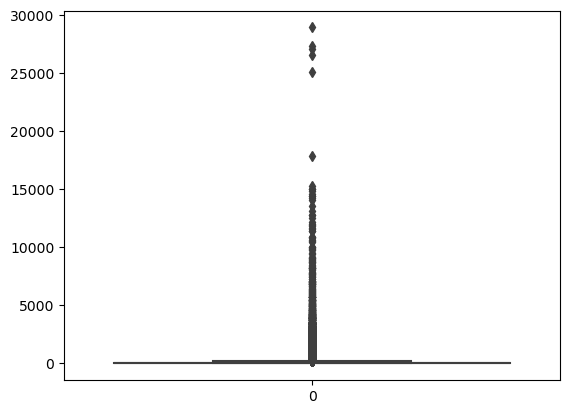

In [197]:
# Boxplot of 'amt' column
sns.boxplot(df.amt)
plt.show()

- Insights:- Maximum amount or outlier amount is 20000 and above

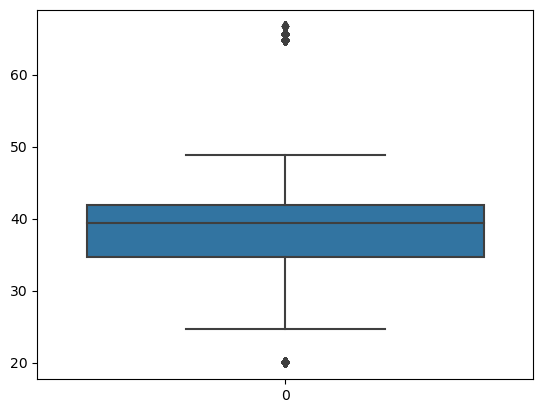

In [198]:
# Boxplot of 'lat' column
sns.boxplot(df.lat)
plt.show()

- All the values are with in the same range except for very few

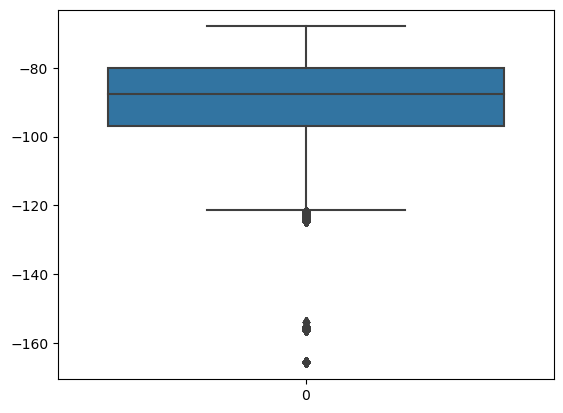

In [199]:
# Boxplot of 'long' column
sns.boxplot(df.long)
plt.show()

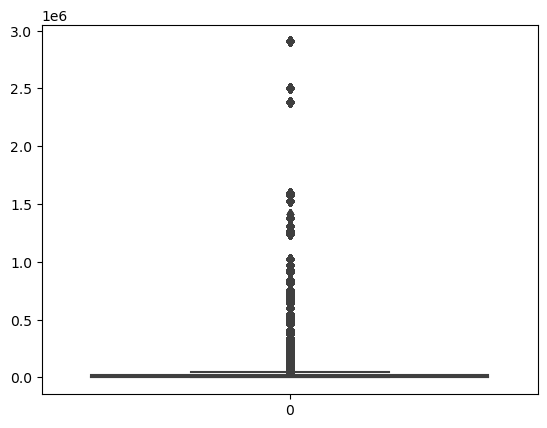

In [200]:
# Boxplot of 'city_pop' column
sns.boxplot(df.city_pop)
plt.show()

# Feature Engineering

In [201]:
# Derive Age from the Date of Birth
df["age"] = df["dob"].apply(lambda x : (pd.datetime.now().year - x.year))

# Dropping dob column
df.drop('dob', axis=1, inplace=True)

In [202]:
# split the date and time from the transaction date time column

df['trans_date']=df.trans_date_trans_time.dt.date

df['trans_hour']=df.trans_date_trans_time.dt.hour

df['trans_min']=df.trans_date_trans_time.dt.minute

df['trans_year_month'] = df.trans_date_trans_time.dt.to_period('M')

df['weekday'] = df.trans_date_trans_time.dt.dayofweek

df['trans_date']= pd.to_datetime(df['trans_date'], format='%Y-%m-%d')

In [203]:
# derive the year of and month if the year of the transactions
df['trans_year']=df.trans_date_trans_time.dt.year
df['trans_month'] = df.trans_date_trans_time.dt.month

In [204]:
# Calculate the average transaction amount for each customer
df['avg_trans_amt'] = df.groupby('cc_num')['amt'].transform('mean')

In [205]:
# Calculate the frequency of transactions for each customer
df['trans_freq'] = df.groupby('cc_num')['cc_num'].transform('count')

In [206]:
# Time since last transaction of the customer
df.sort_values(by='trans_date_trans_time', inplace=True)
df['time_since_last_trans'] = df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds()

In [207]:
# Deviation of customers' transaction from their average amount transactions
df['amt_deviation'] = df.groupby('cc_num')['amt'].transform(lambda x: abs(x - x.mean()))

In [208]:
# Customers' transaction frequency change
df['rolling_trans_freq'] = df.groupby('cc_num')['cc_num'].transform(lambda x: x.rolling(window=1).count())
df['trans_freq_deviation'] = df.groupby('cc_num')['rolling_trans_freq'].transform(lambda x: abs(x - x.mean()))

In [209]:
# Change of customers' merchant
df['merchant_diversity'] = df.groupby('cc_num')['merchant'].transform(lambda x: x.nunique())

In [210]:
# Distance from usual transaction
df['usual_lat'] = df.groupby('cc_num')['merch_lat'].transform('mean')
df['usual_long'] = df.groupby('cc_num')['merch_long'].transform('mean')
df['trans_distance'] = ((df['merch_lat'] - df['usual_lat'])**2 + (df['merch_long'] - df['usual_long'])**2)**0.5

In [211]:
# Set 'trans_date_trans_time' as the index
df.set_index('trans_date_trans_time', inplace=True)

# Calculate the rolling transaction frequency for each customer
df['rolling_trans_freq'] = df.groupby('cc_num')['cc_num'].rolling('1H').count().values

In [212]:
df.reset_index(inplace=True)

In [213]:
# Dropping trans_date_trans_time and other columns
df.drop(['trans_date_trans_time'], axis=1, inplace=True)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 36 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   cc_num                 1296675 non-null  int64         
 1   merchant               1296675 non-null  object        
 2   category               1296675 non-null  object        
 3   amt                    1296675 non-null  float64       
 4   gender                 1296675 non-null  object        
 5   street                 1296675 non-null  object        
 6   city                   1296675 non-null  object        
 7   state                  1296675 non-null  object        
 8   zip                    1296675 non-null  int64         
 9   lat                    1296675 non-null  float64       
 10  long                   1296675 non-null  float64       
 11  city_pop               1296675 non-null  int64         
 12  job                    12966

In [215]:
df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,Region,age,trans_date,trans_hour,trans_min,trans_year_month,weekday,trans_year,trans_month,avg_trans_amt,trans_freq,time_since_last_trans,amt_deviation,rolling_trans_freq,trans_freq_deviation,merchant_diversity,usual_lat,usual_long,trans_distance
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,Psychologist,1325376018,36.011293,-82.048315,0,South,36,2019-01-01,0,0,2019-01,1,2019,1,87.393215,2028,NaN,82.423215,1.0,0.0,625,36.102042,-81.180890,0.872159
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Teacher,1325376044,49.159047,-118.186462,0,West,46,2019-01-01,0,0,2019-01,1,2019,1,53.949320,3030,NaN,53.280680,1.0,0.0,665,48.895595,-118.224897,0.266241
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Officer,1325376051,43.150704,-112.154481,0,West,62,2019-01-01,0,0,2019-01,1,2019,1,65.870040,503,NaN,154.239960,2.0,0.0,347,42.204684,-112.264991,0.952453
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Others,1325376076,47.034331,-112.561071,0,West,57,2019-01-01,0,1,2019-01,1,2019,1,72.776673,493,NaN,27.776673,1.0,0.0,346,46.241246,-112.113833,0.910497
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Therapist,1325376186,38.674999,-78.632459,0,South,38,2019-01-01,0,3,2019-01,1,2019,1,95.178091,2017,NaN,53.218091,2.0,0.0,618,38.405287,-79.420288,0.832718


# Exploratory Data Analysis

In [216]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,trans_hour,trans_min,weekday,trans_year,trans_month,avg_trans_amt,trans_freq,time_since_last_trans,amt_deviation,rolling_trans_freq,trans_freq_deviation,merchant_diversity,usual_lat,usual_long,trans_distance
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.295692e+06,1.296675e+06,1.296675e+06,1296675.0,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,5.074255e+01,1.280486e+01,2.949529e+01,3.070604e+00,2.019287e+03,6.142150e+00,7.035104e+01,1.818725e+03,3.248502e+04,5.655016e+01,1.189499e+00,0.0,5.806413e+02,3.853734e+01,-9.022646e+01,7.652861e-01
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,1.737848e+01,6.817824e+00,1.732018e+01,2.198153e+00,4.522452e-01,3.417703e+00,1.941029e+01,7.425057e+02,4.740098e+04,1.487500e+02,4.617179e-01,0.0,8.935040e+01,5.077072e+00,1.375898e+01,2.848434e-01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00,4.295167e+01,7.000000e+00,0.000000e+00,1.357905e-04,1.000000e+00,0.0,6.000000e+00,2.002393e+01,-1.656884e+02,5.047942e-04
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,3.700000e+01,7.000000e+00,1.400000e+01,1.000000e+00,2.019000e+03,3.000000e+00,5.981365e+01,1.466000e+03,6.013000e+03,1.981938e+01,1.000000e+00,0.0,5.630000e+02,3.462024e+01,-9.680304e+01,5.645677e-01
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.900000e+01,1.400000e+01,3.000000e+01,3.000000e+00,2.019000e+03,6.000000e+00,6.509374e+01,2.000000e+03,1.656000e+04,4.393750e+01,1.000000e+00,0.0,6.070000e+02,3.935301e+01,-8.748103e+01,7.977341e-01
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.200000e+01,1.900000e+01,4.400000e+01,5.000000e+00,2.020000e+03,9.000000e+00,8.327758e+01,2.524000e+03,4.022300e+04,5.951286e+01,1.000000e+00,0.0,6.480000e+02,4.194387e+01,-8.015864e+01,9.769224e-01
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,1.000000e+02,2.300000e+01,5.900000e+01,6.000000e+00,2.020000e+03,1.200000e+01,9.488182e+02,3.123000e+03,1.341471e+06,2.887400e+04,7.000000e+00,0.0,6.780000e+02,6.675650e+01,-6.796133e+01,1.491917e+00


## Univariate Analysis of Numerical variables

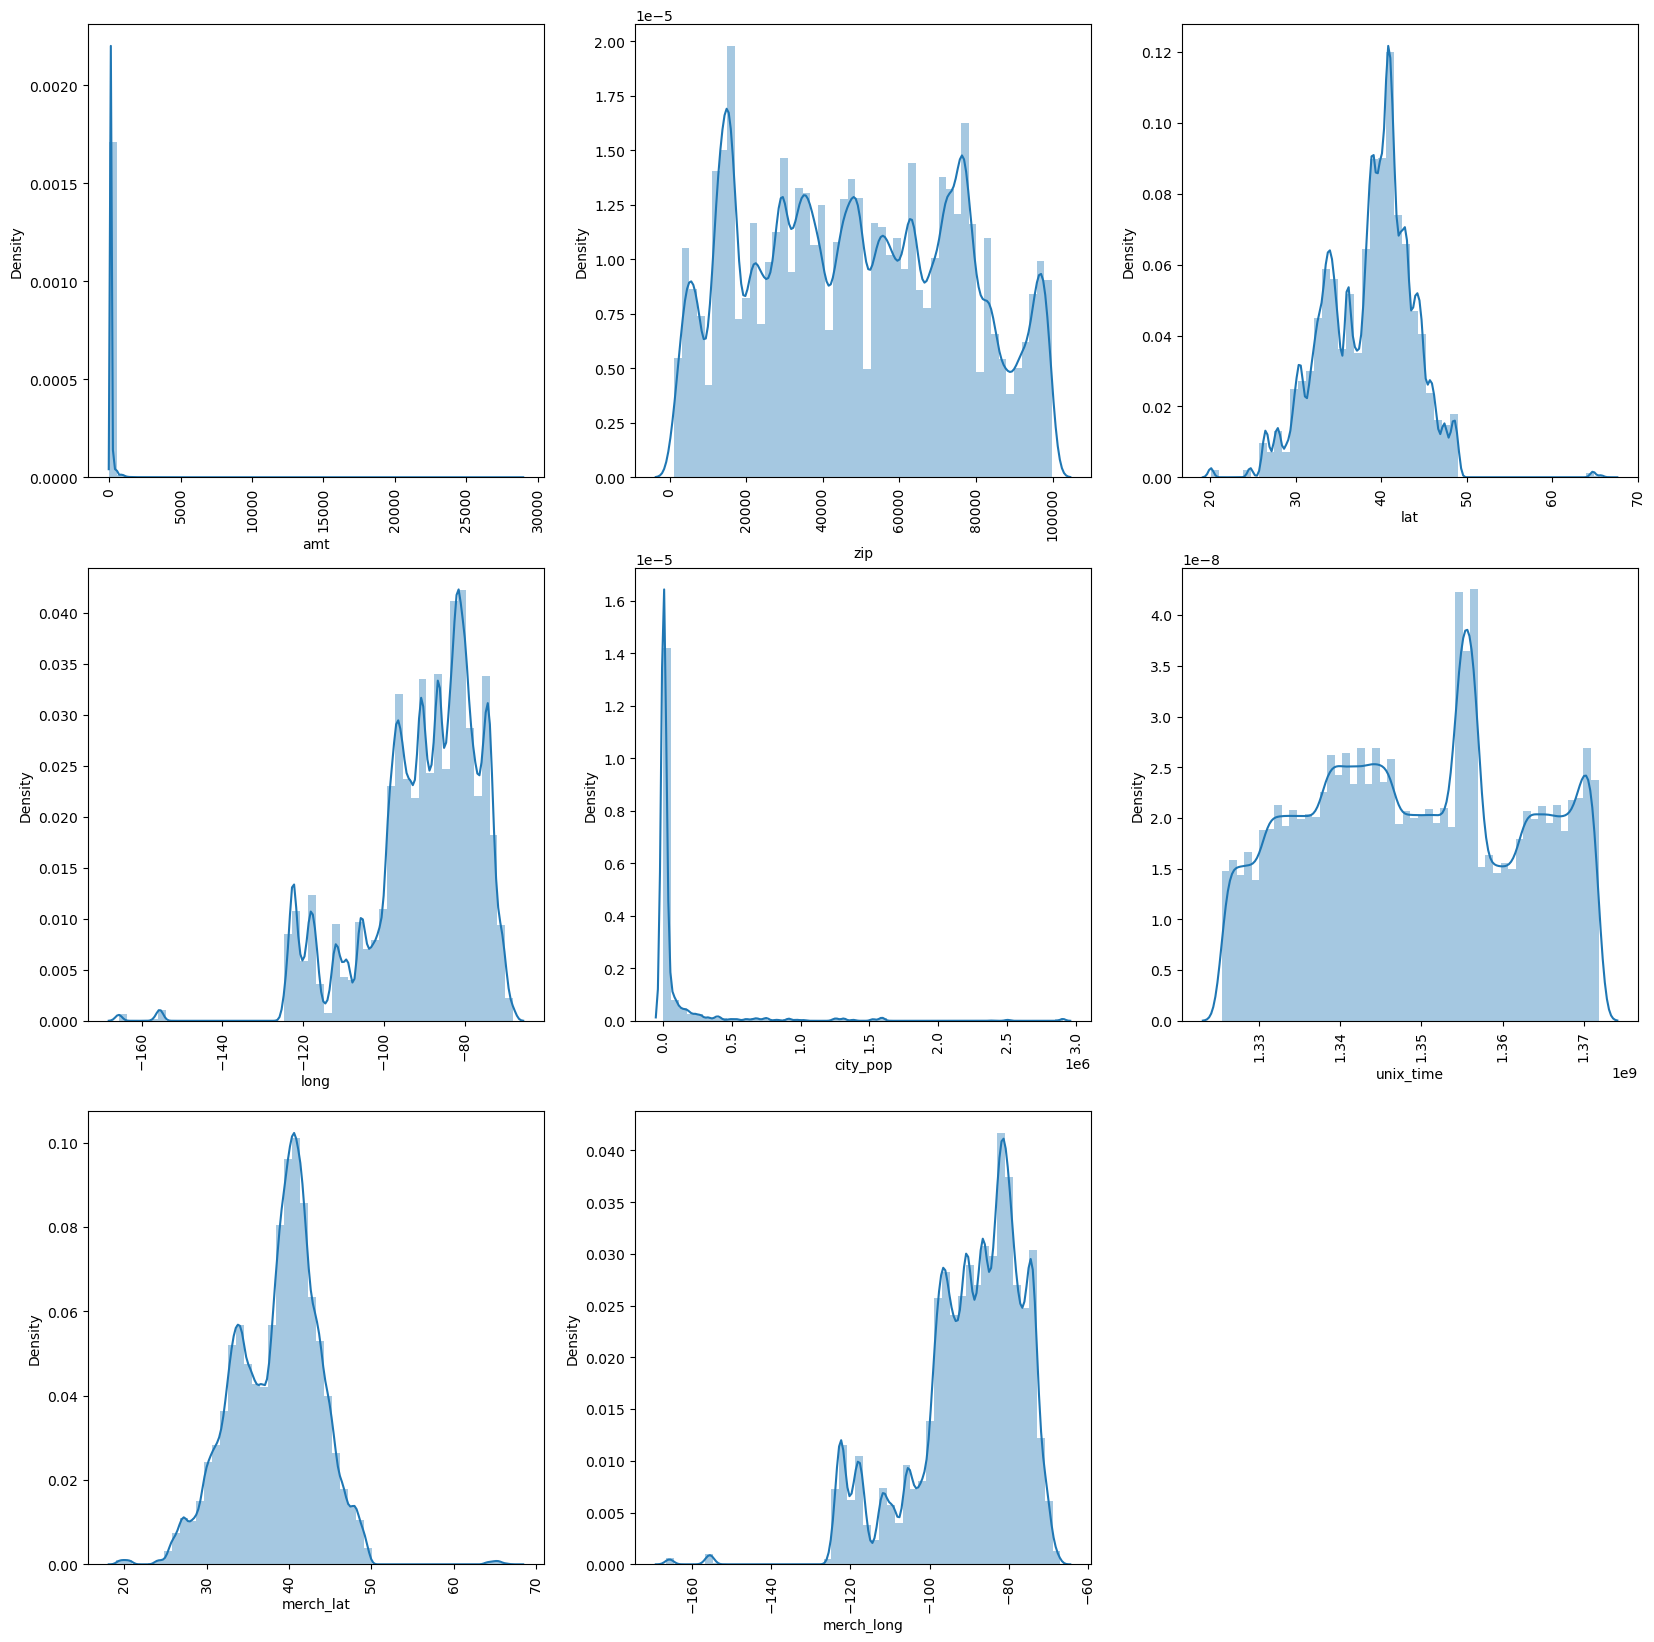

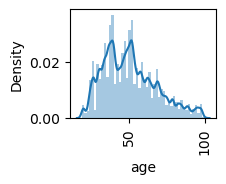

In [217]:
#Creating subplots for various numerical variables
fig= plt.figure(figsize=(20, 20))

plt.subplot(3,3,1)
sns.distplot(df['amt'])
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.distplot(df['zip'])
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.distplot(df['lat'])
plt.xticks(rotation = 90)

plt.subplot(3,3,4)
sns.distplot(df['long'])
plt.xticks(rotation = 90)

plt.subplot(3,3,5)
sns.distplot(df['city_pop'])
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
sns.distplot(df['unix_time'])
plt.xticks(rotation = 90)

plt.subplot(3,3,7)
sns.distplot(df['merch_lat'])
plt.xticks(rotation = 90)

plt.subplot(3,3,8)
sns.distplot(df['merch_long'])
plt.xticks(rotation = 90)
plt.show()

plt.subplot(3,3,9)
sns.distplot(df['age'])
plt.xticks(rotation = 90)
plt.show()

- Insights:- The column 'amt' and 'city_pop' are highly skewed. We will transform these columns during data preparation for model building.

## univariate analysis of categorical variables

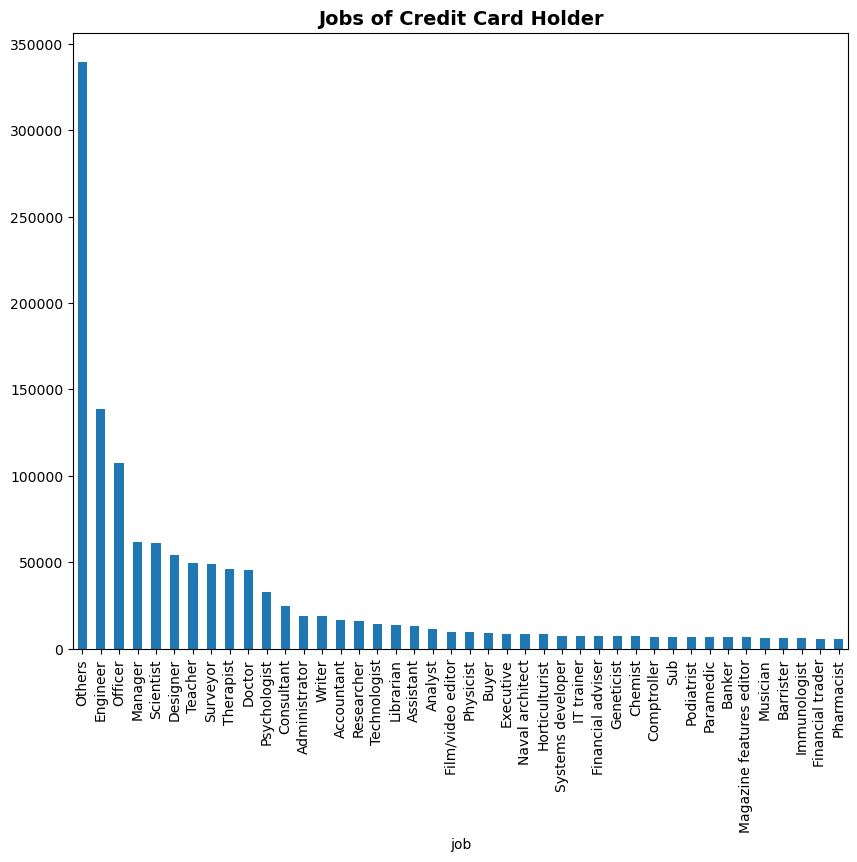

In [218]:
plt.figure(figsize =(10,8))
df['job'].value_counts().plot.bar()
plt.xlabel('job')
plt.title('Jobs of Credit Card Holder', fontsize=14, fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

- Insights: - Majority of the credit card holders are engineers and officers. As Others category is mix of various jobs it is shown as high

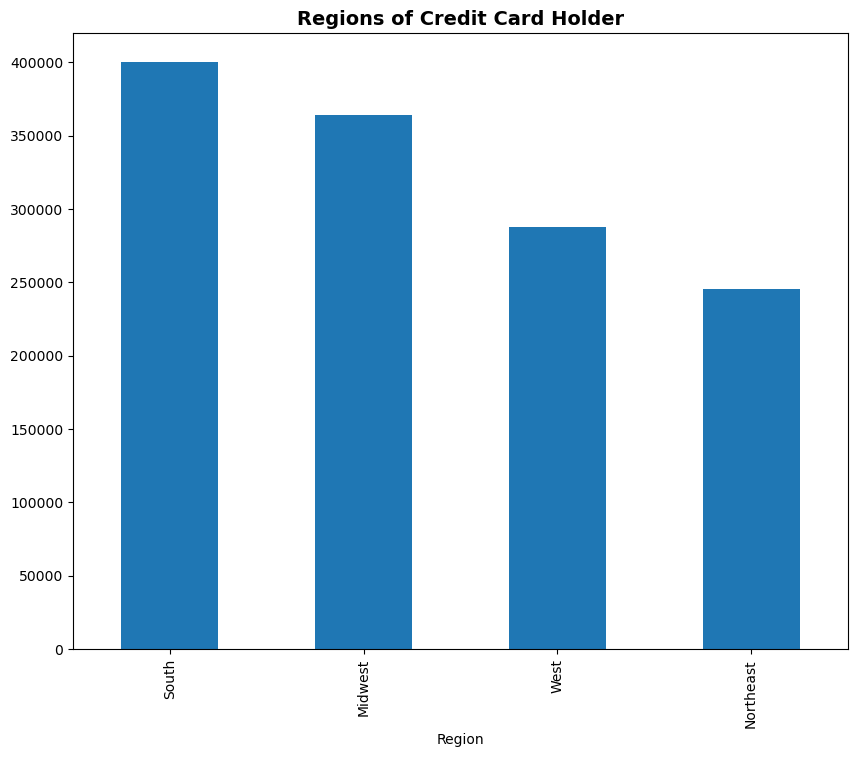

In [219]:
# Plotting the value count of 'Region'
plt.figure(figsize =(10,8))
df['Region'].value_counts().plot.bar()
plt.xlabel('Region')
plt.title('Regions of Credit Card Holder', fontsize=14, fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

- Insights:- States that belong to south are having majority credit card transactions

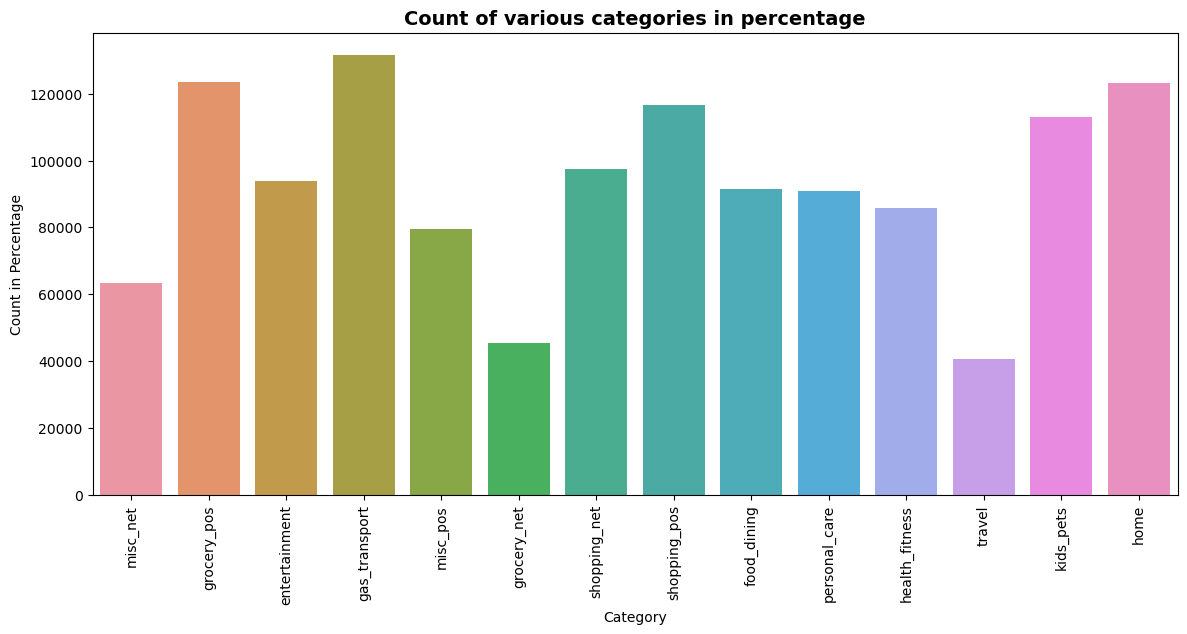

In [220]:
# Plotting countplot of 'Category'
fig= plt.figure(figsize=(14, 6))

sns.countplot(data=df, x='category')

plt.xticks(rotation = 90)

plt.title('Count of various categories in percentage', fontsize=14, fontweight='bold')

plt.xlabel('Category')

plt.ylabel('Count in Percentage')

plt.show()

- Insights - Majority of the category belongs to transport , grocery Pos, home followed by shopping pos, shopping net and kids_pets

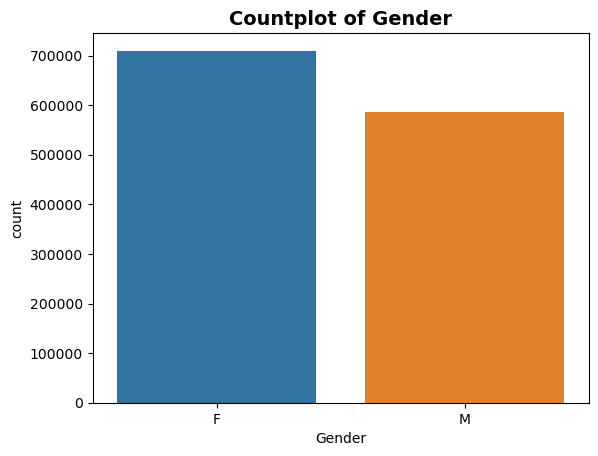

In [221]:
# COuntplot of 'Gender'
sns.countplot(data=df, x='gender')

plt.title('Countplot of Gender', fontsize=14, fontweight='bold')

plt.xlabel('Gender')

plt.show()

- Majority of the credit card holders are Females

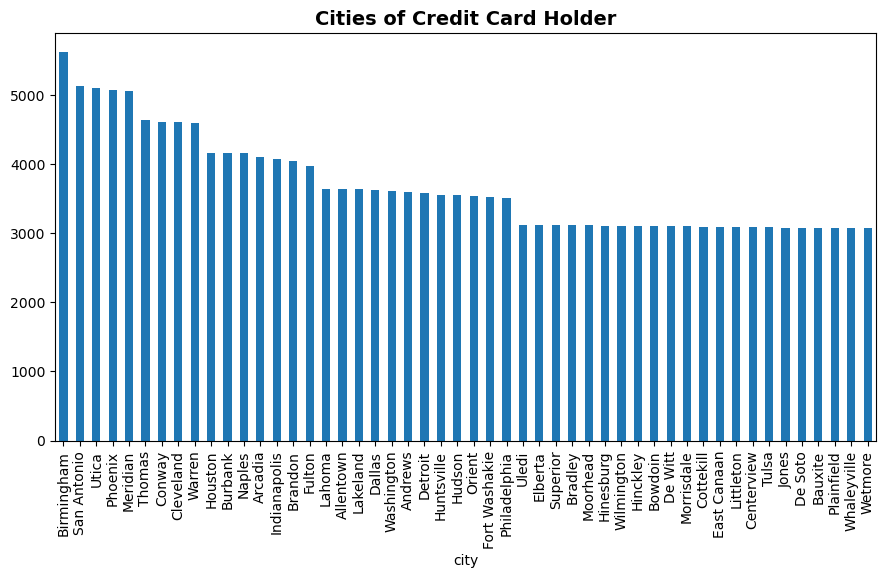

In [222]:
# Value count of cities
plt.figure(figsize =(36,18))
plt.subplot(3,3,1)
df['city'].value_counts().head(50).plot.bar()
plt.xlabel('city')
plt.title('Cities of Credit Card Holder', fontsize=14, fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

- Insights- Top fifty cities of the credit card holders , Brimingham being the highest .
Above are the Top 50 streets of the Credit card holders

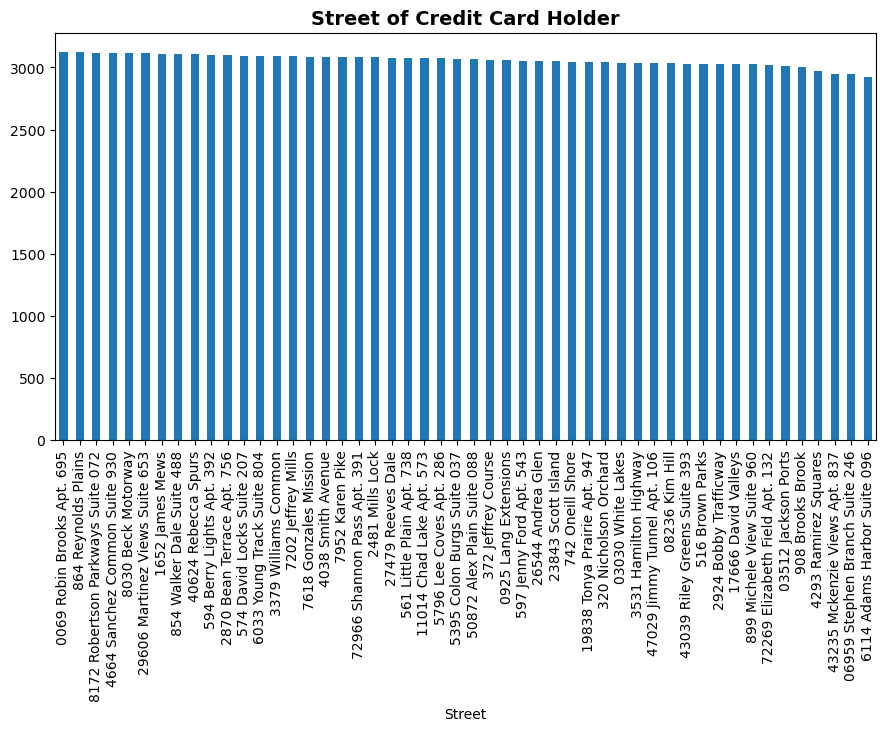

In [223]:
# Value count of street
plt.figure(figsize =(36,18))
plt.subplot(3,3,2)
df['street'].value_counts().head(50).plot.bar()
plt.xlabel('Street')
plt.title('Street of Credit Card Holder', fontsize=14, fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

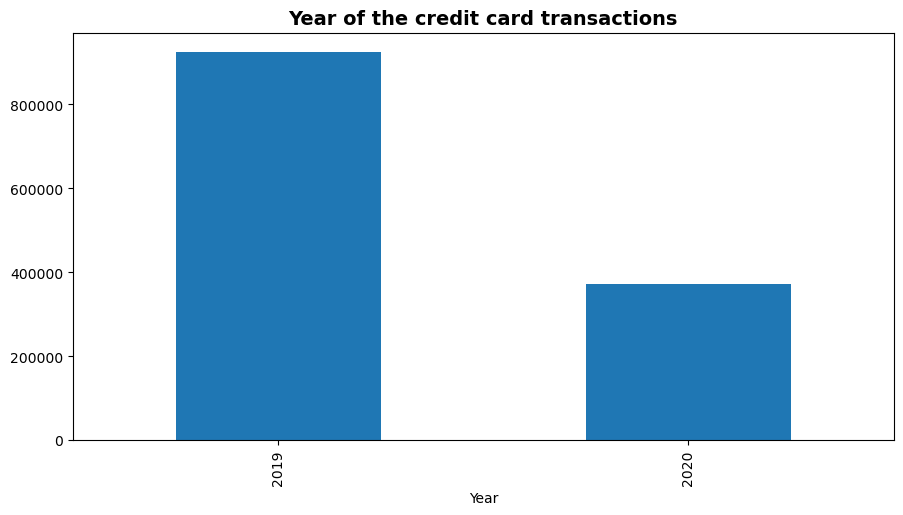

In [224]:
plt.figure(figsize =(36,18))
plt.subplot(3,3,1)
df['trans_year'].value_counts().head(50).plot.bar()
plt.xlabel('Year')
plt.title('Year of the credit card transactions', fontsize=14, fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

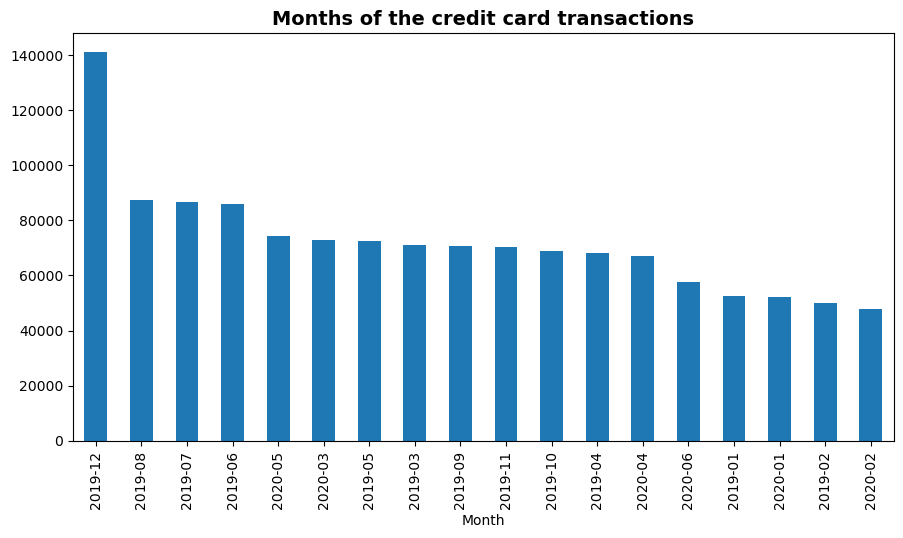

In [225]:

plt.figure(figsize =(36,18))
plt.subplot(3,3,1)
df['trans_year_month'].value_counts().head(50).plot.bar()
plt.xlabel('Month')
plt.title('Months of the credit card transactions', fontsize=14, fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

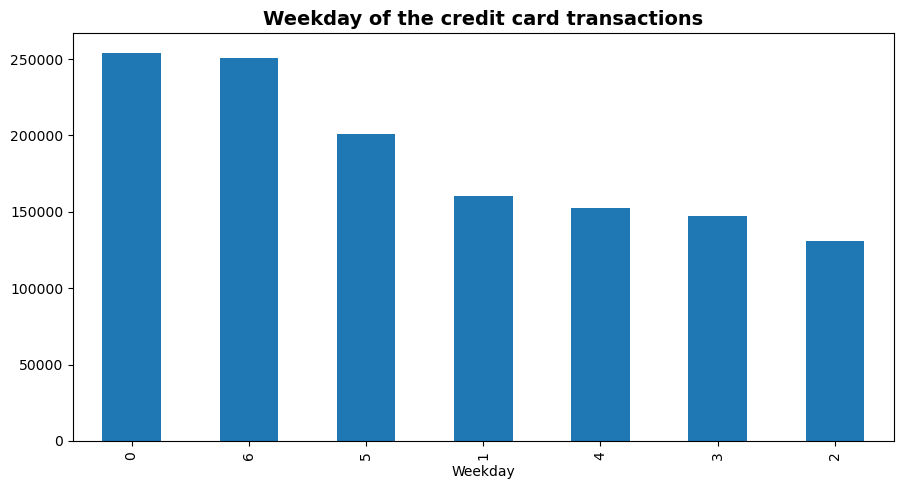

In [226]:

plt.figure(figsize =(36,18))
plt.subplot(3,3,1)
df['weekday'].value_counts().head(50).plot.bar()
plt.xlabel('Weekday')
plt.title('Weekday of the credit card transactions', fontsize=14, fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

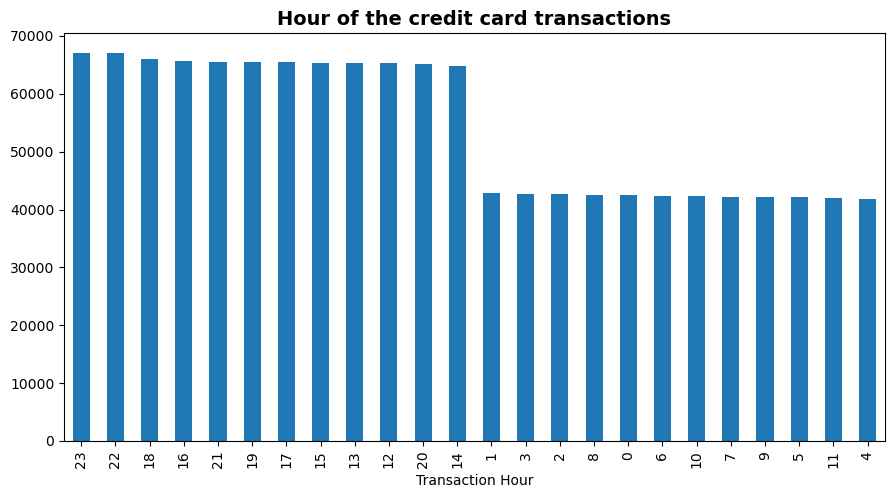

In [227]:

plt.figure(figsize =(36,18))
plt.subplot(3,3,1)
df['trans_hour'].value_counts().head(50).plot.bar()
plt.xlabel('Transaction Hour')
plt.title('Hour of the credit card transactions', fontsize=14, fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

## Bi variate Analysis

In [228]:
# Creating a function for countplot of two columns
def Bivar(col1,col2):
    fig= plt.figure(figsize=(16, 6))
    sns.countplot(x = col1, hue = col2, data = df)
    plt.xticks(rotation = 90)
    plt.show()

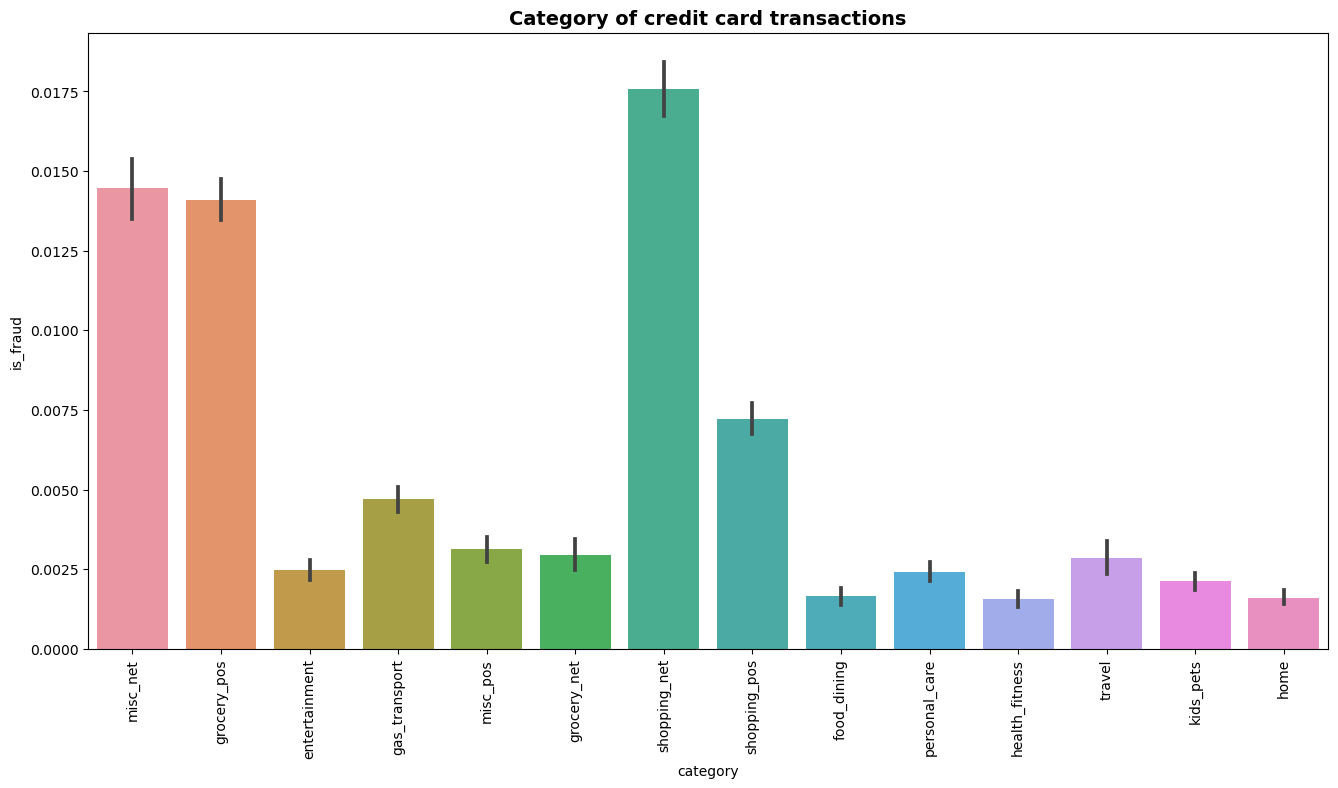

In [229]:
# countplot of category with fraud as hue

# Plotting a barplot of month-wise frauds committed
fig,ax = plt.subplots(figsize=(16,8))

sns.barplot(x=df.category,y = df.is_fraud,data=df)
plt.title('Category of credit card transactions', fontsize=14, fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

- Insights: - Most of the credit card transactions belong to Home, grocery_pos and gas_transport category. fradulent transactions are more in shipping_net and grocery_pos

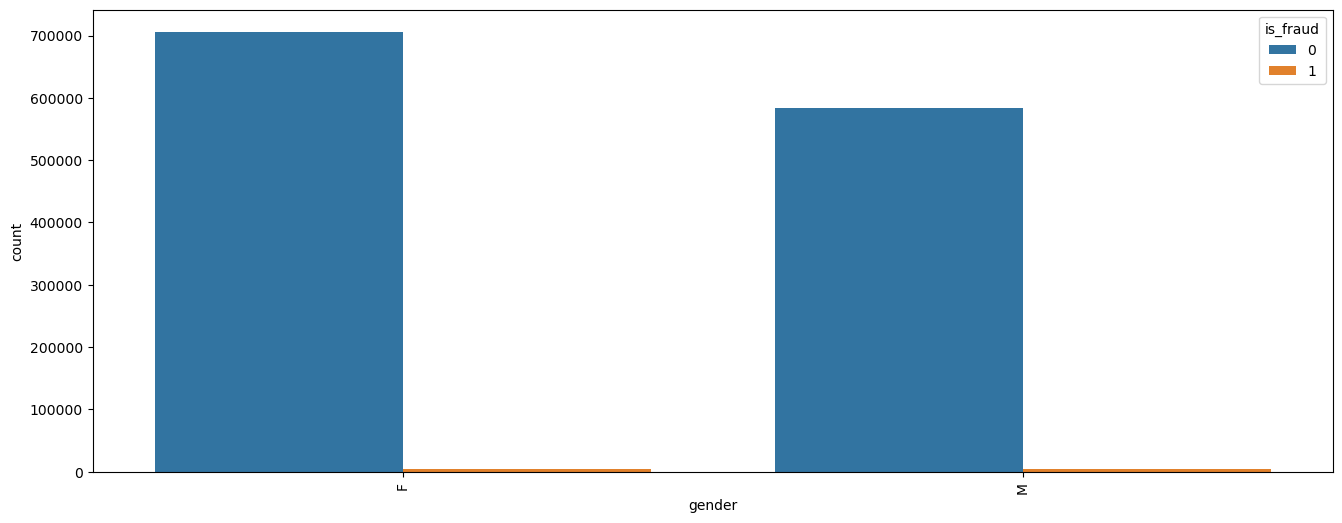

In [230]:
# Countplot of gender with fraud as hue
Bivar(df.gender,df.is_fraud)

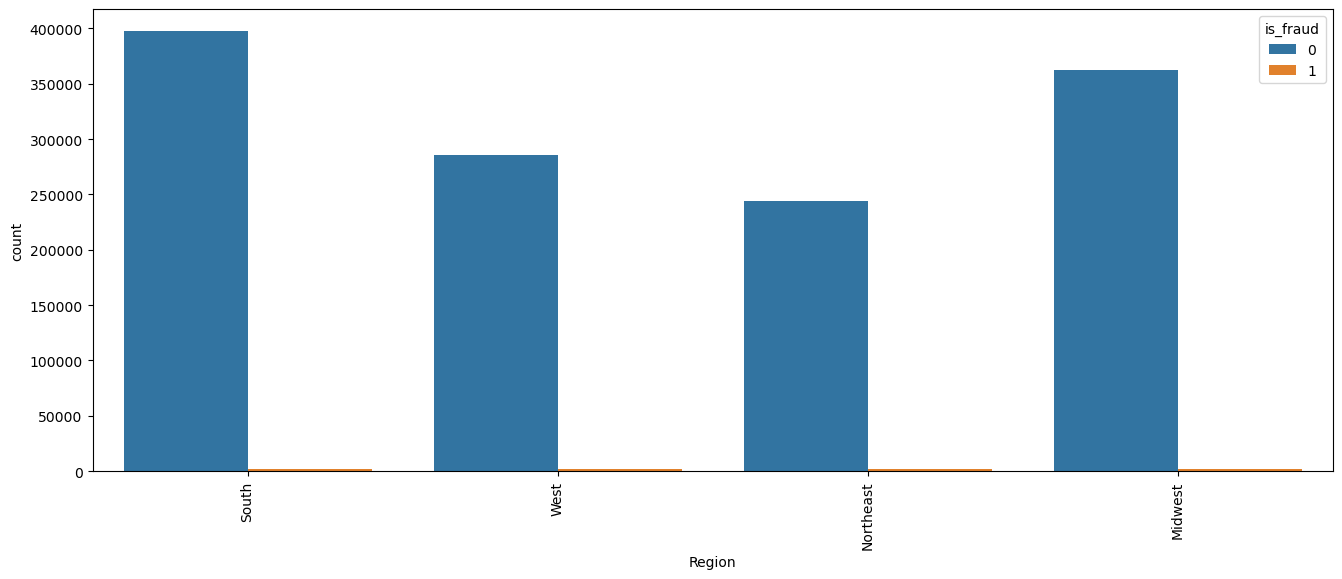

In [231]:
# Countplot of region with fraud as hue
Bivar(df.Region,df.is_fraud)

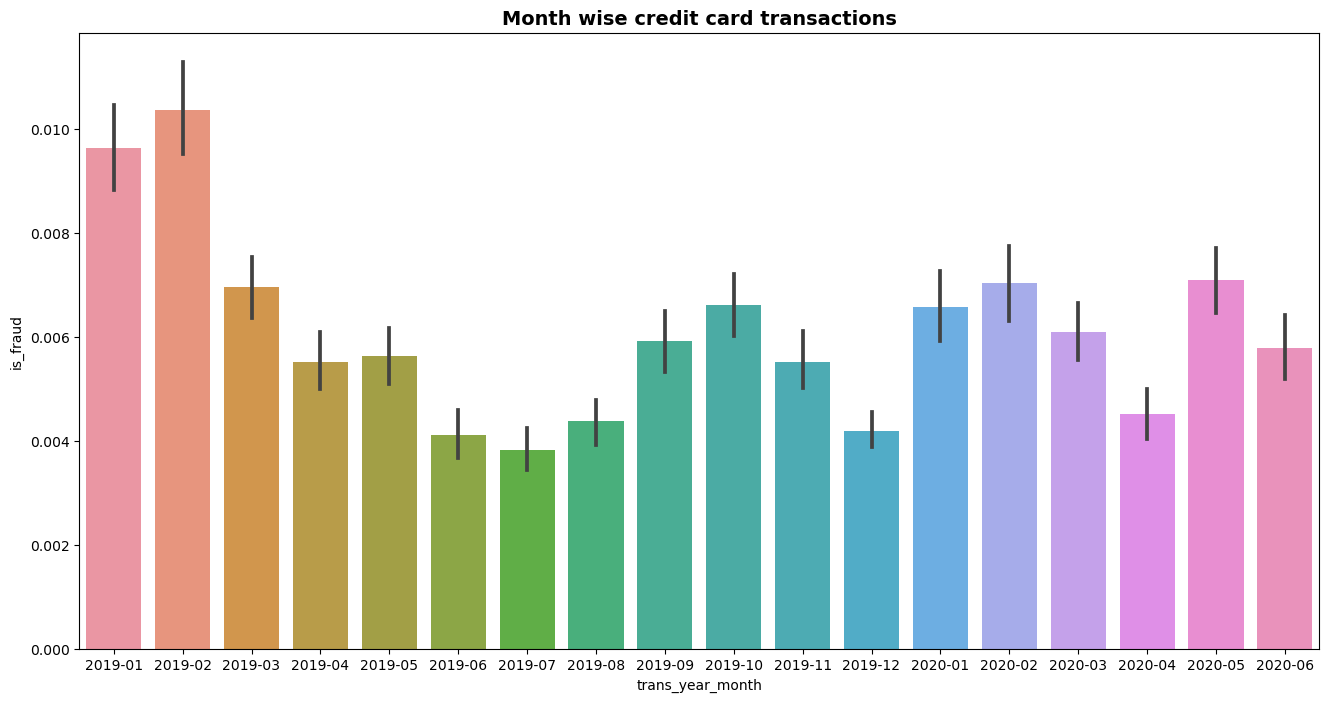

In [232]:
# Plotting a barplot of month-wise frauds committed
fig,ax = plt.subplots(figsize=(16,8))

sns.barplot(x=df.trans_year_month,y = df.is_fraud,data=df)
plt.title('Month wise credit card transactions', fontsize=14, fontweight='bold')
plt.show()

- Insights:- Feb 2019 has highest number of credit card transactions

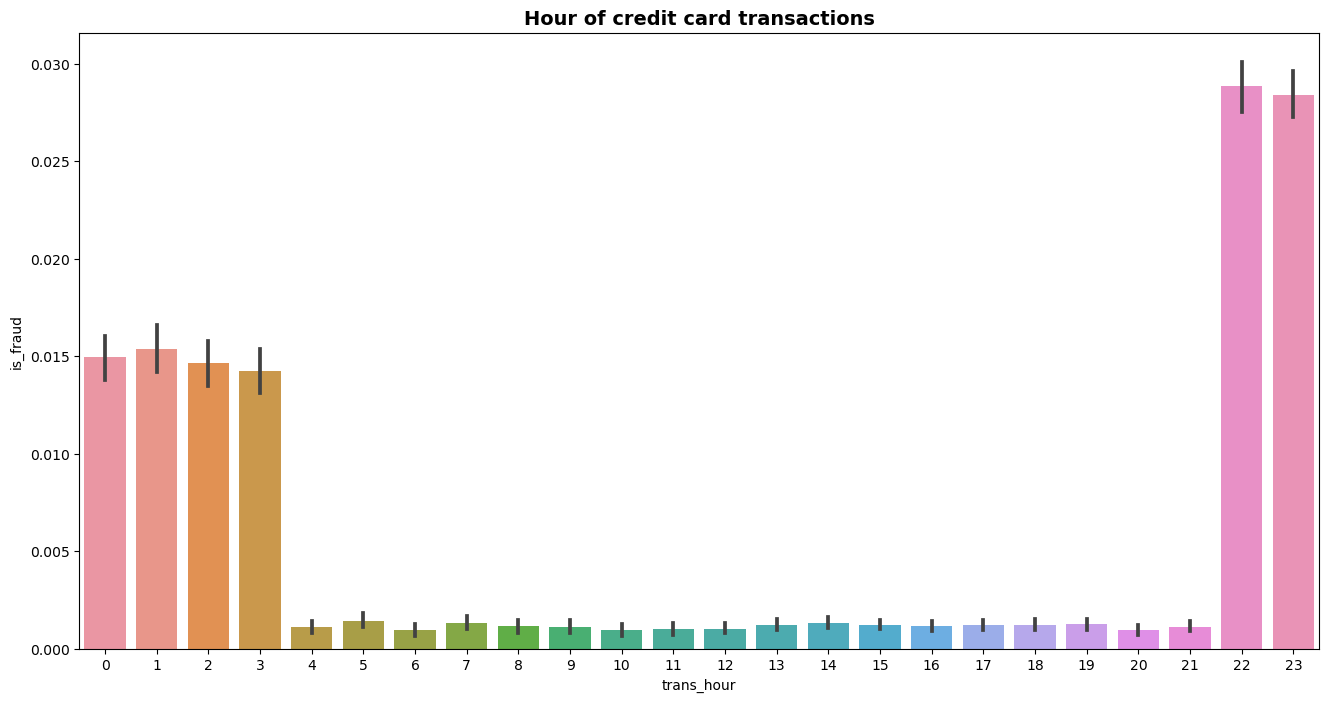

In [233]:
# Plotting a barplot of month-wise frauds committed
fig,ax = plt.subplots(figsize=(16,8))

sns.barplot(x=df.trans_hour,y = df.is_fraud,data=df)
plt.title('Hour of credit card transactions', fontsize=14, fontweight='bold')
plt.show()

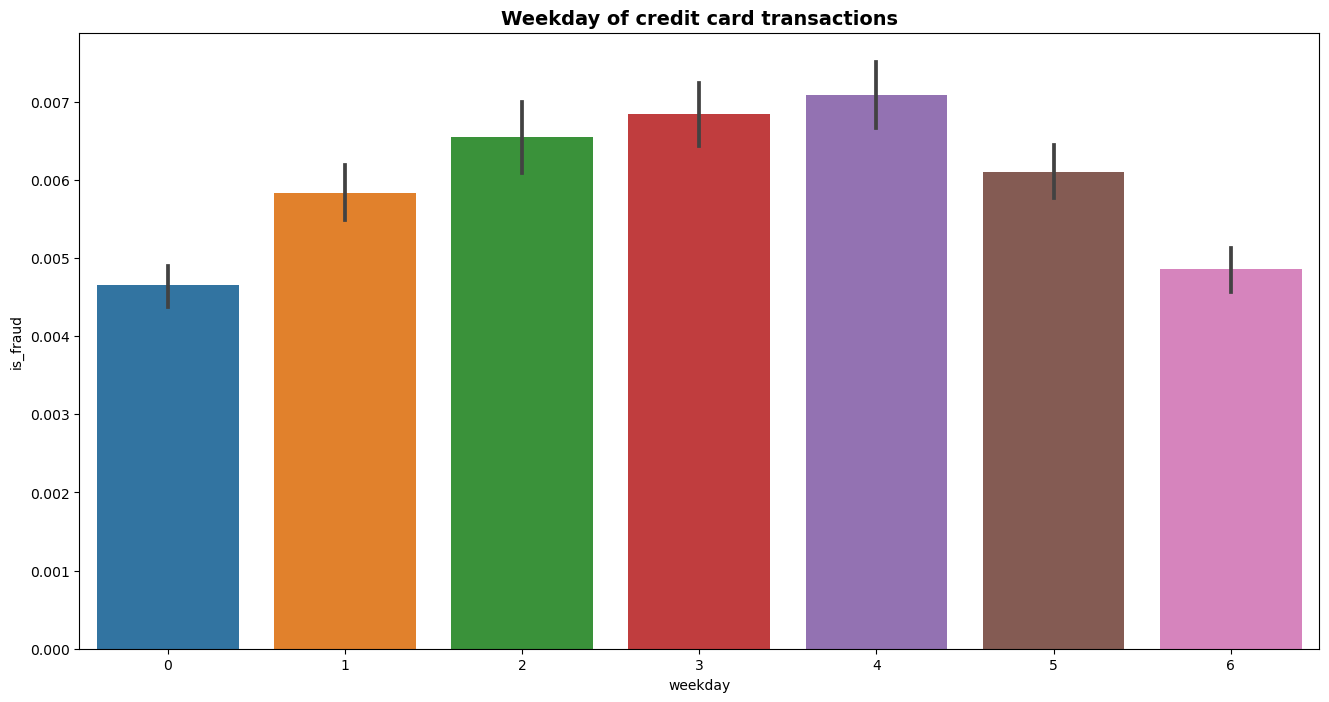

In [234]:
# Plotting a barplot of month-wise frauds committed
fig,ax = plt.subplots(figsize=(16,8))

sns.barplot(x=df.weekday,y = df.is_fraud,data=df)
plt.title('Weekday of credit card transactions', fontsize=14, fontweight='bold')
plt.show()

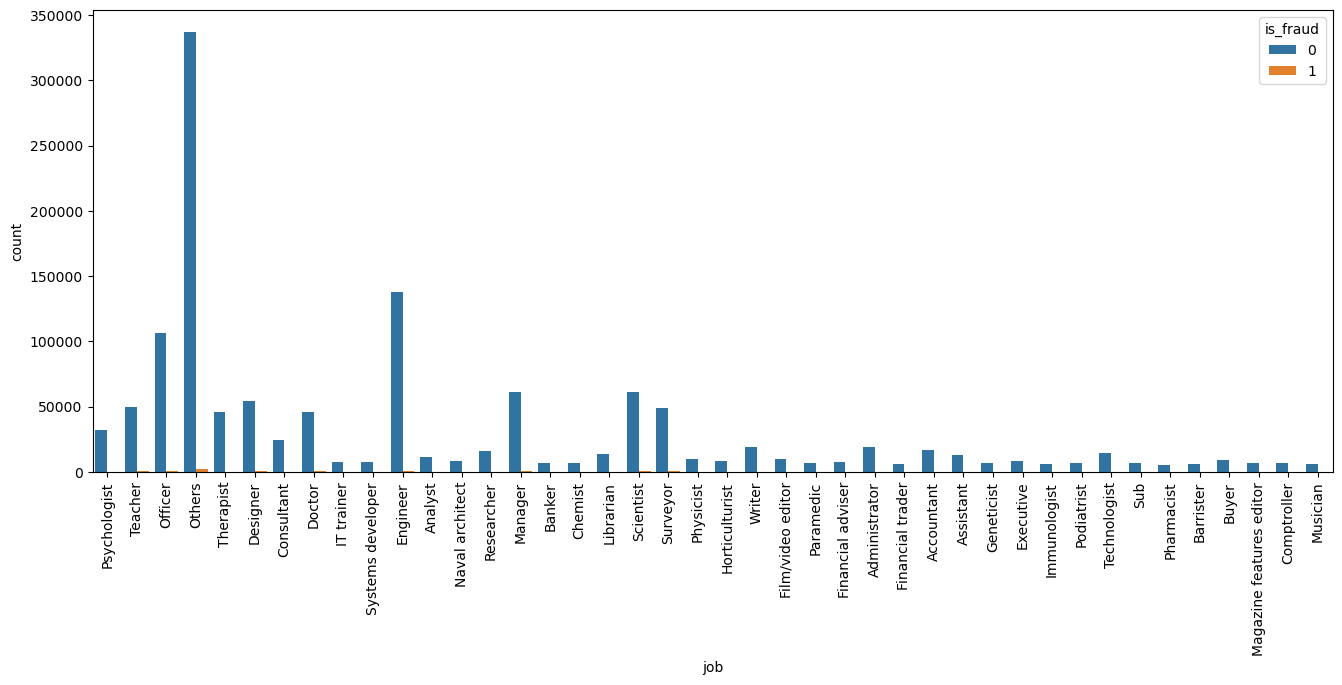

In [235]:
# Countplot of job with fraud as hue
Bivar(df.job,df.is_fraud)


- Insights - Officers and Engineers and other job categories have more credit card transactions.

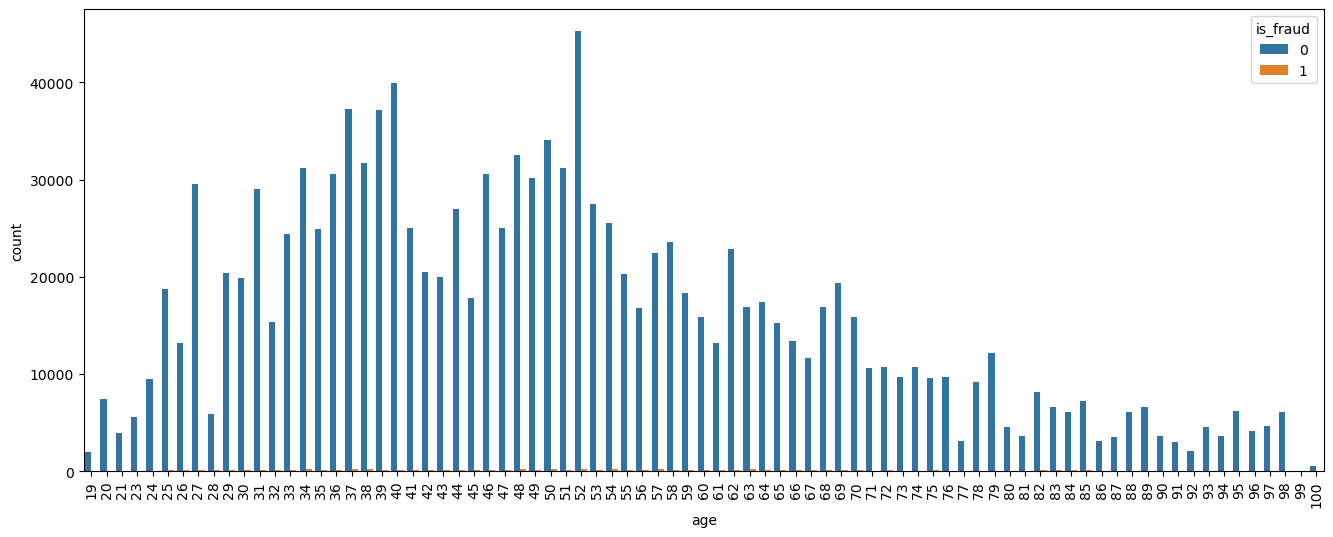

In [236]:
Bivar(df.age,df.is_fraud)


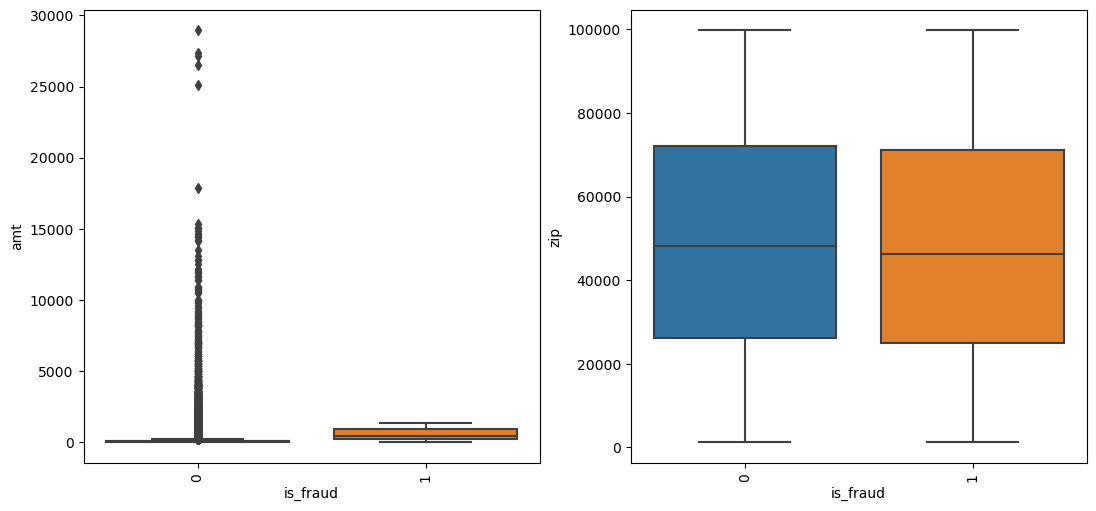

In [237]:
# Creating box sub plots of Amt and Zip with fraud
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y = "amt", x = "is_fraud", data = df)
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.boxplot(y = "zip", x = "is_fraud", data = df)
plt.xticks(rotation = 90)

plt.show()

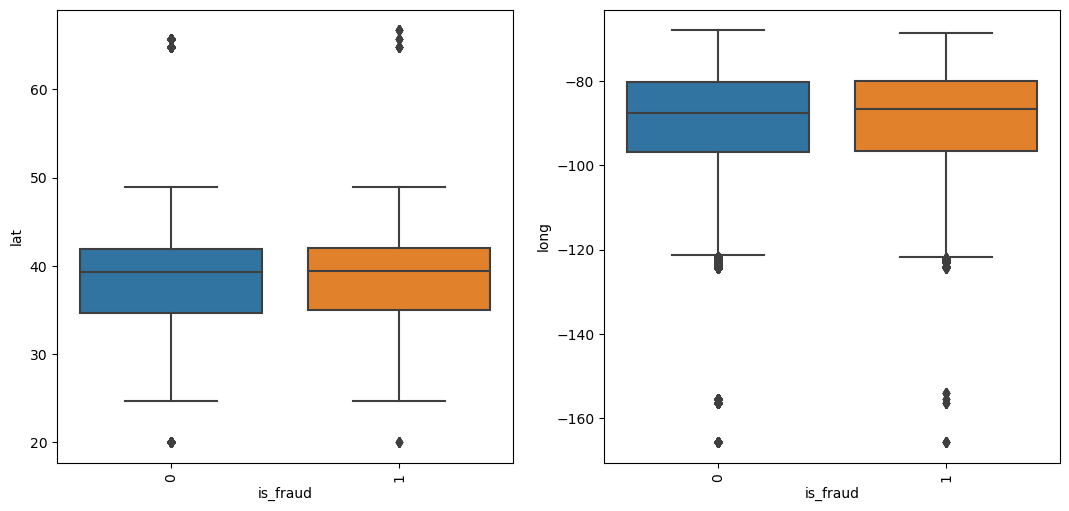

In [238]:
# Creating box sub plots of lat and long with fraud
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y = "lat", x = "is_fraud", data = df)
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.boxplot(y = "long", x = "is_fraud", data = df)
plt.xticks(rotation = 90)

plt.show()

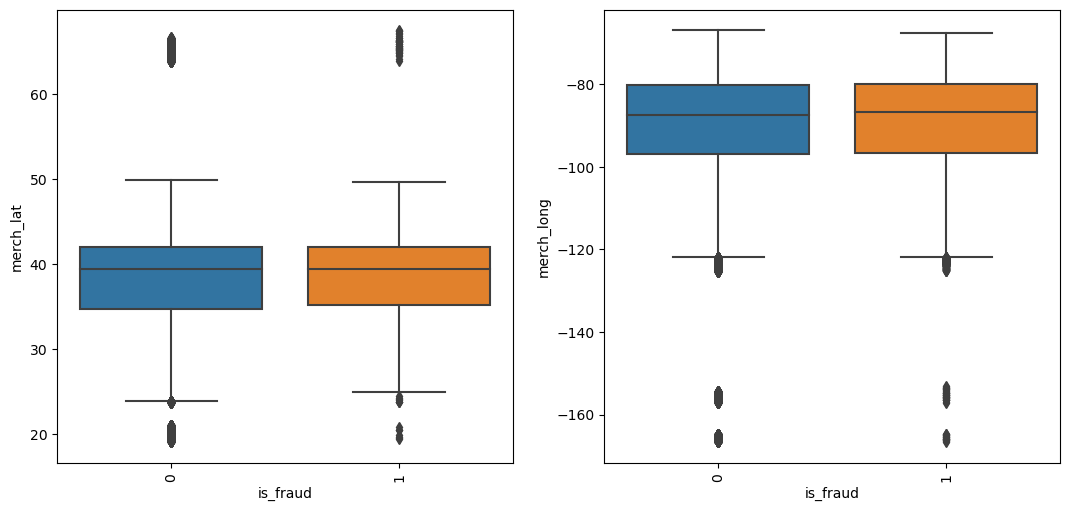

In [239]:
# Creating box sub plots of merch_lat and merch_long with fraud
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y = "merch_lat", x = "is_fraud", data = df)
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.boxplot(y = "merch_long", x = "is_fraud", data = df)
plt.xticks(rotation = 90)

plt.show()

In [240]:
#Creating segmented Data for further EDA

df_fraud =df[df['is_fraud']==1].copy()
df_nonfraud =df[df['is_fraud']==0].copy()

In [241]:
df_fraud.shape

(7506, 36)

In [242]:
df_fraud.isnull().sum()

cc_num                    0
merchant                  0
category                  0
amt                       0
gender                    0
street                    0
city                      0
state                     0
zip                       0
lat                       0
long                      0
city_pop                  0
job                       0
unix_time                 0
merch_lat                 0
merch_long                0
is_fraud                  0
Region                    0
age                       0
trans_date                0
trans_hour                0
trans_min                 0
trans_year_month          0
weekday                   0
trans_year                0
trans_month               0
avg_trans_amt             0
trans_freq                0
time_since_last_trans    75
amt_deviation             0
rolling_trans_freq        0
trans_freq_deviation      0
merchant_diversity        0
usual_lat                 0
usual_long                0
trans_distance      

In [243]:
df_nonfraud.shape

(1289169, 36)

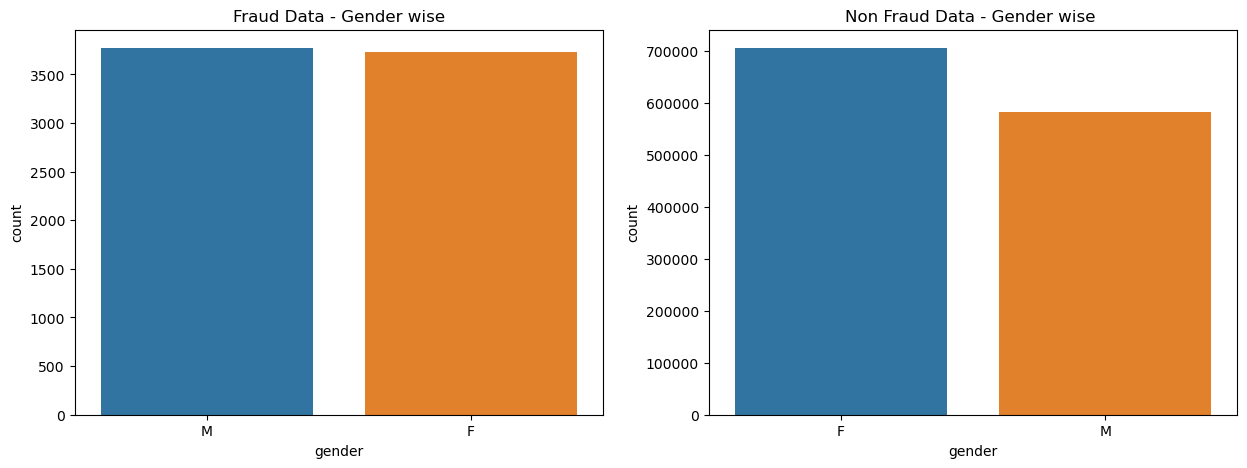

In [244]:
# Plotting fraud gender-wise
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(data=df_fraud, x='gender')
plt.title('Fraud Data - Gender wise')
#plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(data = df_nonfraud, x='gender')
plt.title('Non Fraud Data - Gender wise ')
#plt.xticks(rotation = 90)
plt.show()

- Insights:- There are more fradulent transactions with Female gender compared to Male .

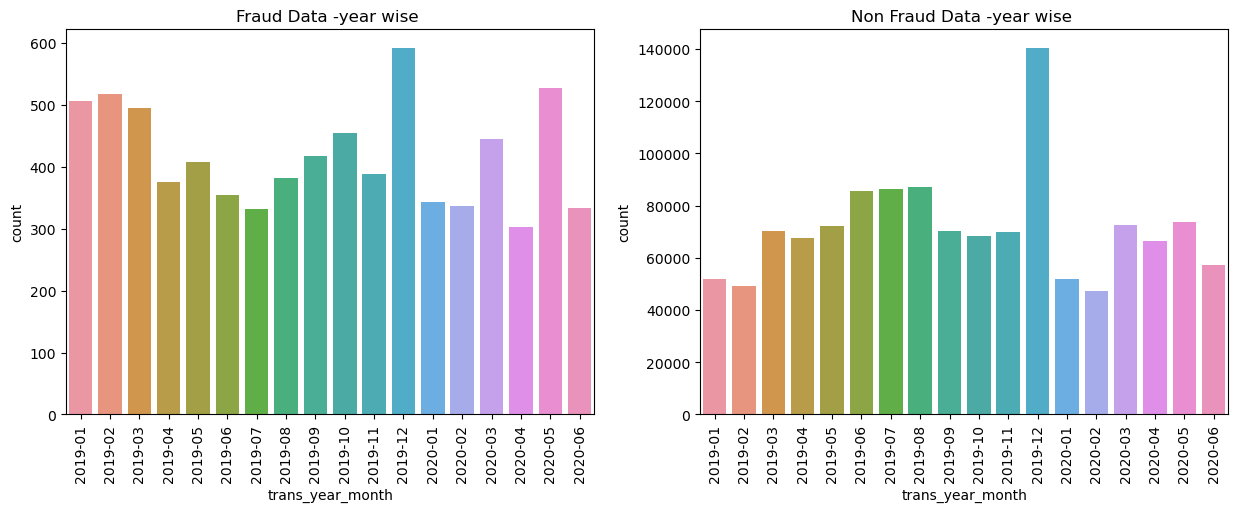

In [245]:
# Fraud and Non-Fraud year wise
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(data=df_fraud, x='trans_year_month')
plt.title('Fraud Data -year wise ')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(data=df_nonfraud, x='trans_year_month')
plt.title('Non Fraud Data -year wise ')
plt.xticks(rotation = 90)
plt.show()

- Insights :- There are more fradulent transactions in 2019 Dec

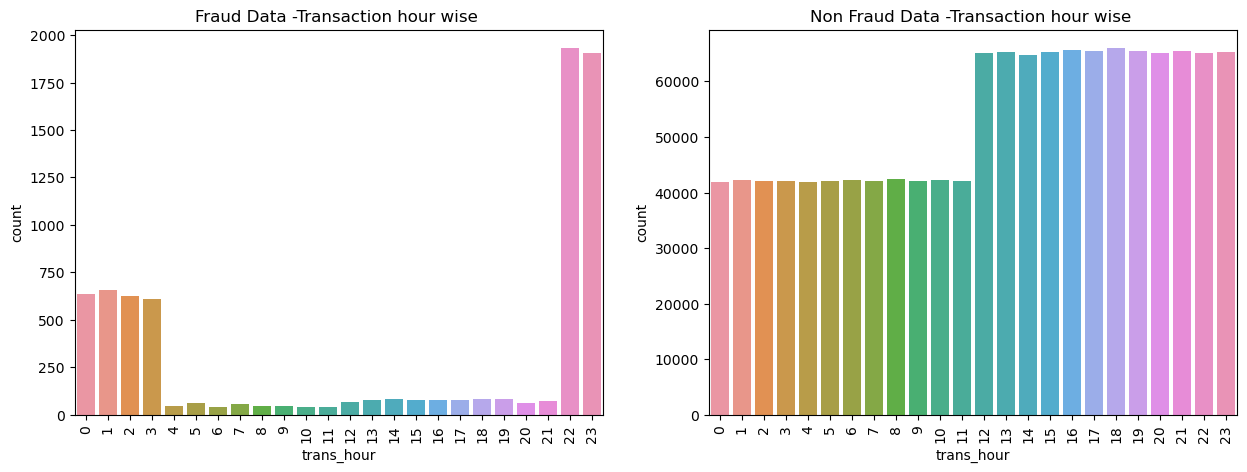

In [246]:
# Fraud and Non-Fraud year wise
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(data=df_fraud, x='trans_hour')
plt.title('Fraud Data -Transaction hour wise ')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(data=df_nonfraud, x='trans_hour')
plt.title('Non Fraud Data -Transaction hour wise ')
plt.xticks(rotation = 90)
plt.show()

Insights - Fradulent transactions are more during 10 and 11 PM.

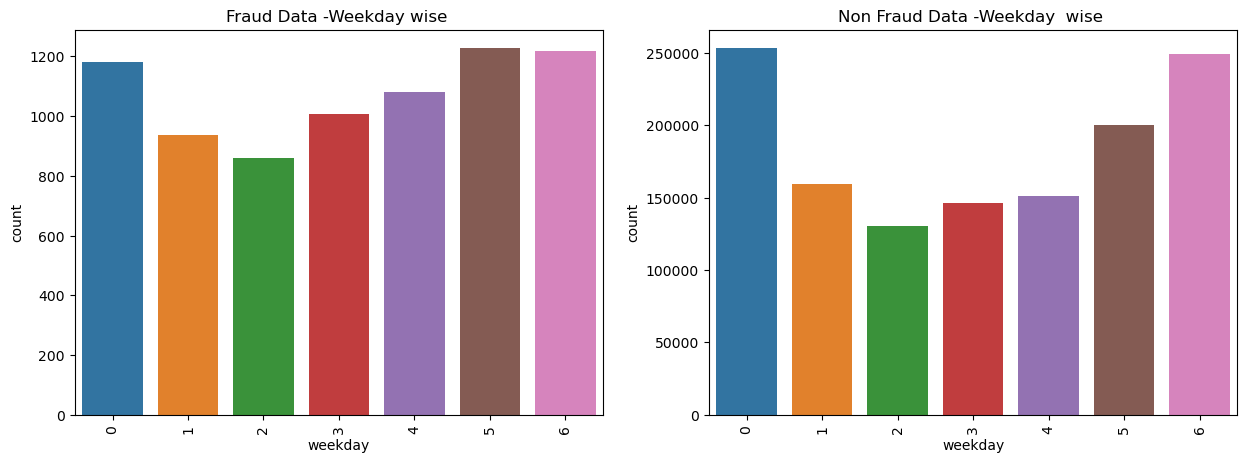

In [247]:
# Fraud and Non-Fraud year wise
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(data=df_fraud, x='weekday')
plt.title('Fraud Data -Weekday wise ')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(data=df_nonfraud, x='weekday')
plt.title('Non Fraud Data -Weekday  wise ')
plt.xticks(rotation = 90)
plt.show()

Insights:- Fradulent transactions are higher on Saturday , Sunday and followed by Monday

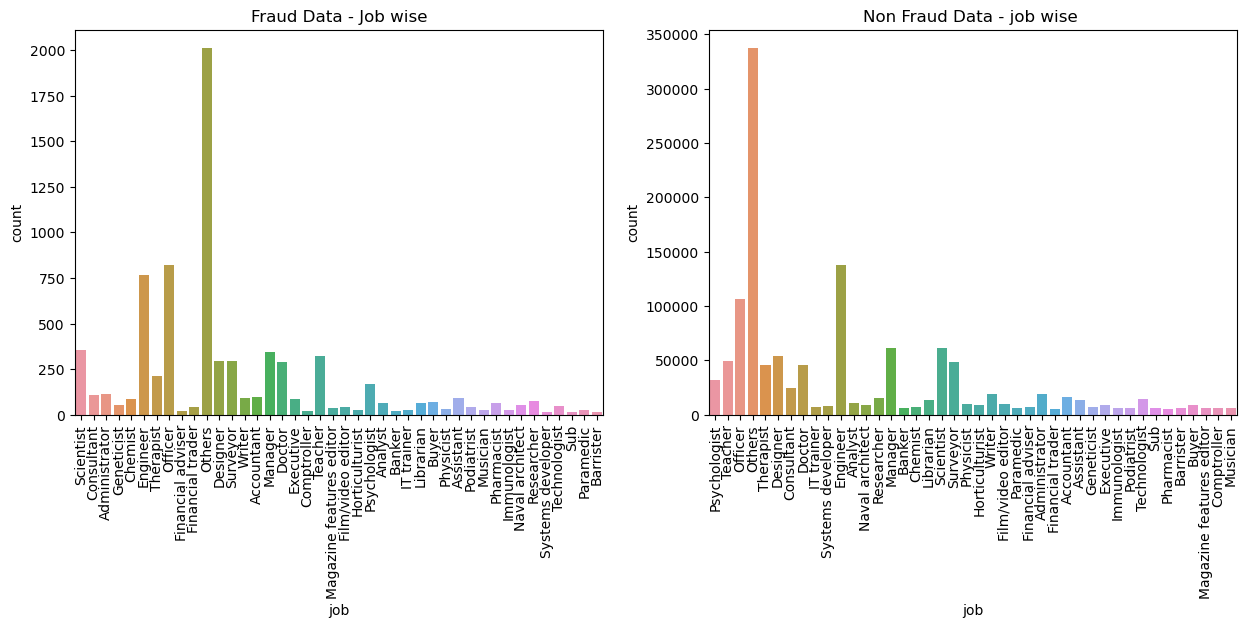

In [248]:
# PLotting fraud and non fraud job-wise
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(data=df_fraud, x='job')
plt.title('Fraud Data - Job wise')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(data=df_nonfraud, x='job')
plt.title('Non Fraud Data - job wise ')
plt.xticks(rotation = 90)
plt.show()

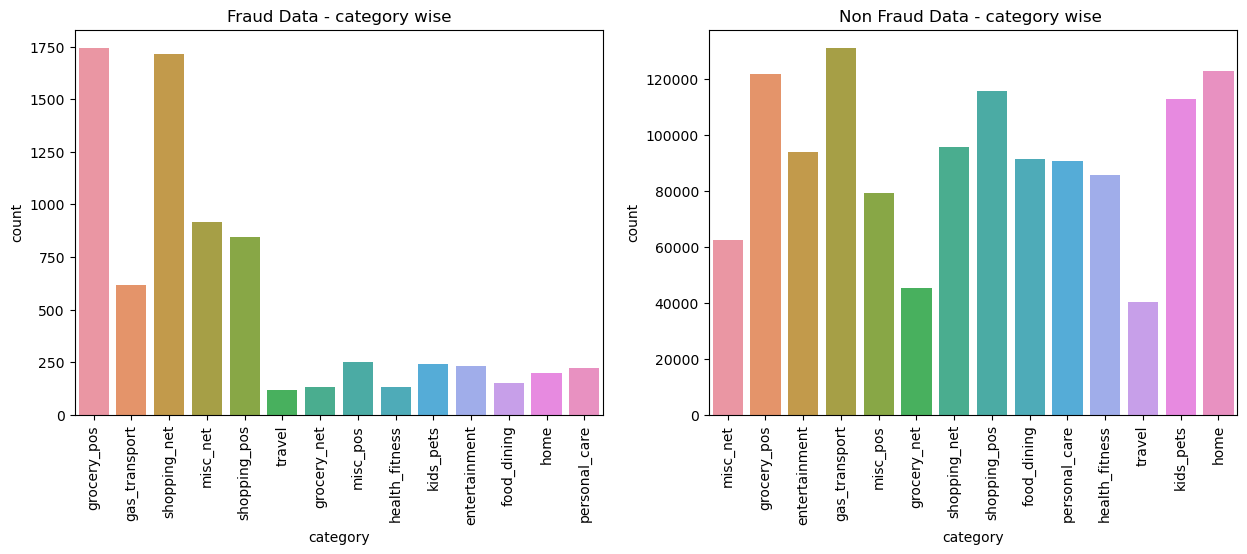

In [249]:
# Plotting fraud and non-fraud category-wise
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(data=df_fraud, x='category')
plt.title('Fraud Data - category wise')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(data=df_nonfraud, x='category')
plt.title('Non Fraud Data - category wise ')
plt.xticks(rotation = 90)
plt.show()

Insights:- Fradulent transactions are higher for categories under grocery_pos and shopping_net

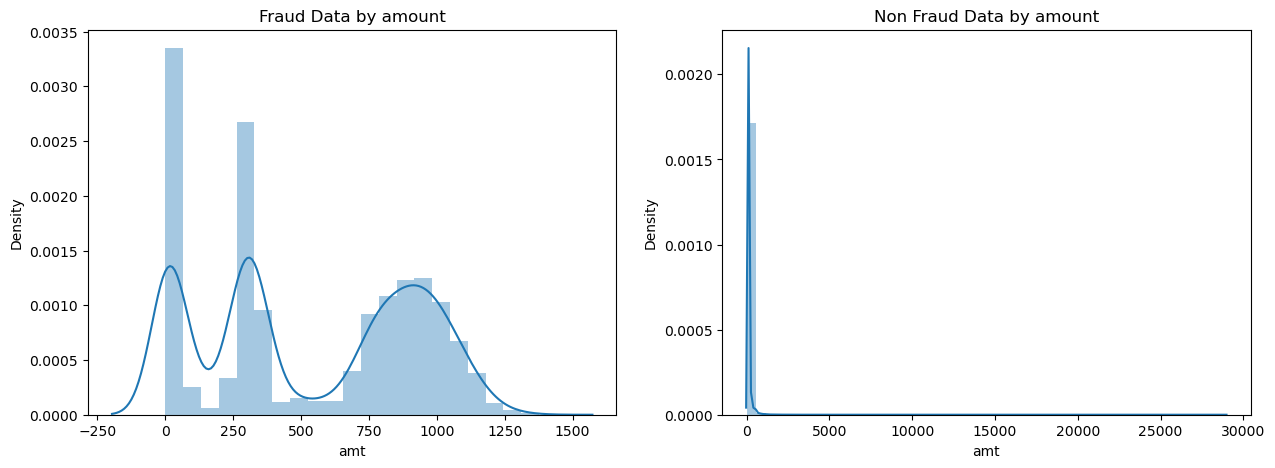

In [250]:
# PLotting distplot of amt in fraud and non-fraud
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['amt'])
plt.title('Fraud Data by amount')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['amt'])
plt.title('Non Fraud Data by amount')
plt.show()

In [251]:
df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,Region,age,trans_date,trans_hour,trans_min,trans_year_month,weekday,trans_year,trans_month,avg_trans_amt,trans_freq,time_since_last_trans,amt_deviation,rolling_trans_freq,trans_freq_deviation,merchant_diversity,usual_lat,usual_long,trans_distance
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,Psychologist,1325376018,36.011293,-82.048315,0,South,36,2019-01-01,0,0,2019-01,1,2019,1,87.393215,2028,NaN,82.423215,1.0,0.0,625,36.102042,-81.180890,0.872159
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Teacher,1325376044,49.159047,-118.186462,0,West,46,2019-01-01,0,0,2019-01,1,2019,1,53.949320,3030,NaN,53.280680,1.0,0.0,665,48.895595,-118.224897,0.266241
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Officer,1325376051,43.150704,-112.154481,0,West,62,2019-01-01,0,0,2019-01,1,2019,1,65.870040,503,NaN,154.239960,2.0,0.0,347,42.204684,-112.264991,0.952453
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Others,1325376076,47.034331,-112.561071,0,West,57,2019-01-01,0,1,2019-01,1,2019,1,72.776673,493,NaN,27.776673,1.0,0.0,346,46.241246,-112.113833,0.910497
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Therapist,1325376186,38.674999,-78.632459,0,South,38,2019-01-01,0,3,2019-01,1,2019,1,95.178091,2017,NaN,53.218091,2.0,0.0,618,38.405287,-79.420288,0.832718


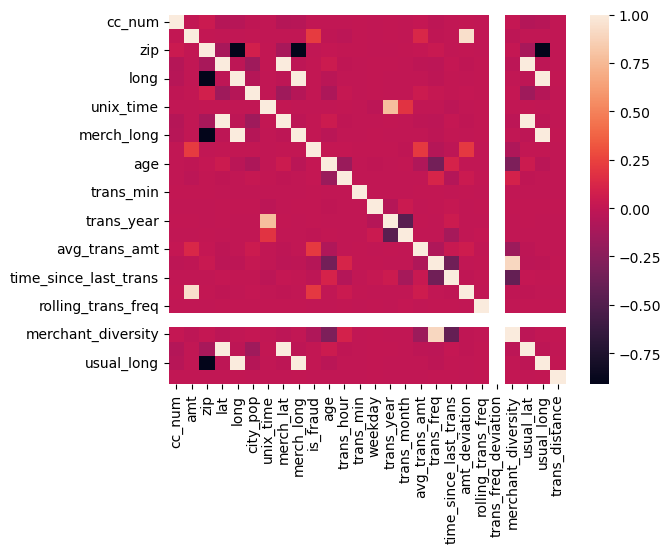

In [252]:
sns.heatmap(df.corr())
plt.show()

In [253]:
# Dropping highly correlated columns
df.drop(['lat', 'long'], axis=1, inplace=True)

In [254]:
df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,Region,age,trans_date,trans_hour,trans_min,trans_year_month,weekday,trans_year,trans_month,avg_trans_amt,trans_freq,time_since_last_trans,amt_deviation,rolling_trans_freq,trans_freq_deviation,merchant_diversity,usual_lat,usual_long,trans_distance
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,3495,Psychologist,1325376018,36.011293,-82.048315,0,South,36,2019-01-01,0,0,2019-01,1,2019,1,87.393215,2028,NaN,82.423215,1.0,0.0,625,36.102042,-81.180890,0.872159
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Teacher,1325376044,49.159047,-118.186462,0,West,46,2019-01-01,0,0,2019-01,1,2019,1,53.949320,3030,NaN,53.280680,1.0,0.0,665,48.895595,-118.224897,0.266241
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Officer,1325376051,43.150704,-112.154481,0,West,62,2019-01-01,0,0,2019-01,1,2019,1,65.870040,503,NaN,154.239960,2.0,0.0,347,42.204684,-112.264991,0.952453
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Others,1325376076,47.034331,-112.561071,0,West,57,2019-01-01,0,1,2019-01,1,2019,1,72.776673,493,NaN,27.776673,1.0,0.0,346,46.241246,-112.113833,0.910497
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,99,Therapist,1325376186,38.674999,-78.632459,0,South,38,2019-01-01,0,3,2019-01,1,2019,1,95.178091,2017,NaN,53.218091,2.0,0.0,618,38.405287,-79.420288,0.832718


### Cost Benefit Analysis -Part 1

In [255]:
# Find the unique number of months from the Dataset

df.trans_year_month.unique()

<PeriodArray>
['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
 '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
 '2020-03', '2020-04', '2020-05', '2020-06']
Length: 18, dtype: period[M]

In [256]:
##Average number of credit card transactions per month

Avg_trans_per_month = df.shape[0]/18
Avg_trans_per_month

72037.5

In [257]:
## average number of fraudulent transaction per month 

Avg_fraud_trans_per_month =df_fraud.shape[0]/18
Avg_fraud_trans_per_month

417.0

In [258]:
df_fraud.amt.isnull().sum()

0

In [259]:
##  average fraud amount 


Avg_fraud_amount = df_fraud.amt.sum()/df_fraud.shape[0]
Avg_fraud_amount

531.3200919264589

## Data Preparation for modelling

In [260]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_features = ['merchant', 'category', 'gender', 'street', 'city', 'state', 'job']
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

In [261]:
# Dropping unnecessaty columns
df.drop(['trans_date', 'cc_num', 'zip', 'trans_year_month', 'merch_lat', 'merch_long', 'usual_lat', 'usual_long'], axis=1, inplace=True)

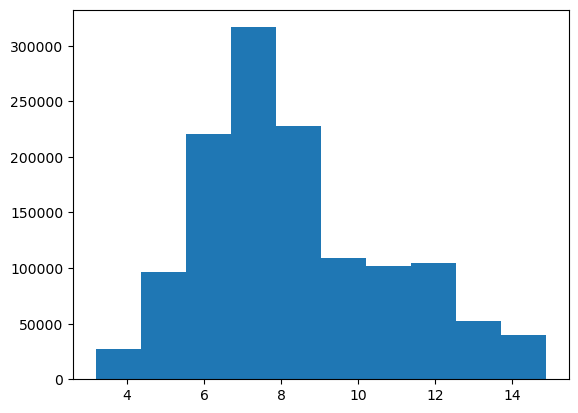

In [262]:
# Power transforming the highly skewed columns
df.city_pop= np.log1p(df.city_pop)
plt.hist(df.city_pop)
plt.show()

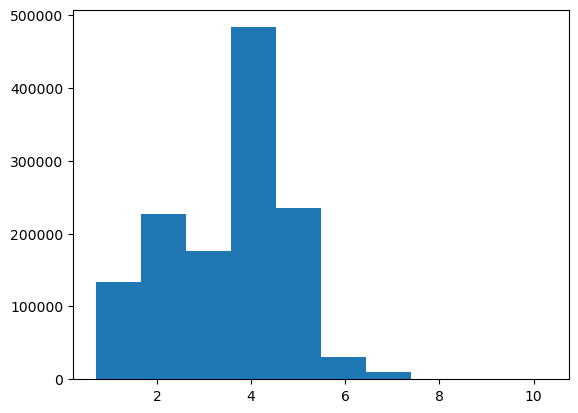

In [263]:
# Power transforming the highly skewed columns
df.amt= np.log1p(df.amt)
plt.hist(df.amt)
plt.show()

In [264]:
df.gender.value_counts()

0    709863
1    586812
Name: gender, dtype: int64

### Dummy Encoding

In [265]:
# Getting the dummy variables of categorical columns
dummy_df = pd.get_dummies(df[['Region']], drop_first=True)
dummy_df

,Region_Northeast,Region_South,Region_West
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
1296670,0,0,1
1296671,0,1,0
1296672,0,0,1
1296673,0,0,0


In [266]:
# Joining the df and dummy variables
df = pd.concat([df, dummy_df], axis=1)
df

,merchant,category,amt,gender,street,city,state,city_pop,job,unix_time,is_fraud,Region,age,trans_hour,trans_min,weekday,trans_year,trans_month,avg_trans_amt,trans_freq,time_since_last_trans,amt_deviation,rolling_trans_freq,trans_freq_deviation,merchant_diversity,trans_distance,Region_Northeast,Region_South,Region_West
0,514,8,1.786747,0,568,526,27,8.159375,32,1325376018,0,South,36,0,0,1,2019,1,87.393215,2028,NaN,82.423215,1.0,0.0,625,0.872159,0,1,0
1,241,4,4.684259,0,435,612,47,5.010635,38,1325376044,0,West,46,0,0,1,2019,1,53.949320,3030,NaN,53.280680,1.0,0.0,665,0.266241,0,0,1
2,390,0,5.398660,1,602,468,13,8.332068,26,1325376051,0,West,62,0,0,1,2019,1,65.870040,503,NaN,154.239960,2.0,0.0,347,0.952453,0,0,1
3,360,2,3.828641,1,930,84,26,7.570443,27,1325376076,0,West,57,0,1,1,2019,1,72.776673,493,NaN,27.776673,1.0,0.0,346,0.910497,0,0,1
4,297,9,3.760269,1,418,216,45,4.605170,40,1325376186,0,South,38,0,3,1,2019,1,95.178091,2017,NaN,53.218091,2.0,0.0,618,0.832718,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,2.806990,1,154,330,44,5.556828,34,1371816728,0,West,63,12,12,6,2020,6,63.182274,1513,16781.0,47.622274,1.0,0.0,578,1.203332,0,0,1
1296671,2,1,3.964615,1,856,813,20,4.615121,3,1371816739,0,South,45,12,12,6,2020,6,101.150621,531,7962.0,49.450621,1.0,0.0,354,0.797288,0,1,0
1296672,599,1,4.672174,1,158,346,32,6.802395,25,1371816752,0,West,57,12,12,6,2020,6,65.235995,2070,29074.0,40.694005,1.0,0.0,626,0.978588,0,0,1
1296673,509,1,4.329417,1,433,471,41,7.027315,27,1371816816,0,Midwest,44,12,13,6,2020,6,95.753691,2024,91018.0,20.853691,1.0,0.0,627,0.897233,0,0,0


In [267]:
# Dropping irrelevant columns
df.drop(['Region'], axis=1, inplace=True)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   merchant               1296675 non-null  int32  
 1   category               1296675 non-null  int32  
 2   amt                    1296675 non-null  float64
 3   gender                 1296675 non-null  int32  
 4   street                 1296675 non-null  int32  
 5   city                   1296675 non-null  int32  
 6   state                  1296675 non-null  int32  
 7   city_pop               1296675 non-null  float64
 8   job                    1296675 non-null  int32  
 9   unix_time              1296675 non-null  int64  
 10  is_fraud               1296675 non-null  int64  
 11  age                    1296675 non-null  int64  
 12  trans_hour             1296675 non-null  int64  
 13  trans_min              1296675 non-null  int64  
 14  weekday           

In [269]:
df.time_since_last_trans.fillna(0, inplace=True)

In [270]:
df.isna().sum()

merchant                 0
category                 0
amt                      0
gender                   0
street                   0
city                     0
state                    0
city_pop                 0
job                      0
unix_time                0
is_fraud                 0
age                      0
trans_hour               0
trans_min                0
weekday                  0
trans_year               0
trans_month              0
avg_trans_amt            0
trans_freq               0
time_since_last_trans    0
amt_deviation            0
rolling_trans_freq       0
trans_freq_deviation     0
merchant_diversity       0
trans_distance           0
Region_Northeast         0
Region_South             0
Region_West              0
dtype: int64

In [271]:
df.dropna(inplace=True)

## Model Building

In [272]:
df.isna().sum()

merchant                 0
category                 0
amt                      0
gender                   0
street                   0
city                     0
state                    0
city_pop                 0
job                      0
unix_time                0
is_fraud                 0
age                      0
trans_hour               0
trans_min                0
weekday                  0
trans_year               0
trans_month              0
avg_trans_amt            0
trans_freq               0
time_since_last_trans    0
amt_deviation            0
rolling_trans_freq       0
trans_freq_deviation     0
merchant_diversity       0
trans_distance           0
Region_Northeast         0
Region_South             0
Region_West              0
dtype: int64

### Train and Test Split

In [273]:
# Performing the Test-Train split on the dataset
df_train,df_testing= train_test_split(df ,train_size=0.7,random_state =100)
print(df_train.shape)
print(df_testing.shape)

(907672, 28)
(389003, 28)


In [274]:
# Using Standard Scaler
scaler = StandardScaler()

In [275]:
# Getting all the numeric columns
num_vars = list(df.columns)
num_vars.remove('is_fraud')

In [276]:
df[num_vars]

,merchant,category,amt,gender,street,city,state,city_pop,job,unix_time,age,trans_hour,trans_min,weekday,trans_year,trans_month,avg_trans_amt,trans_freq,time_since_last_trans,amt_deviation,rolling_trans_freq,trans_freq_deviation,merchant_diversity,trans_distance,Region_Northeast,Region_South,Region_West
0,514,8,1.786747,0,568,526,27,8.159375,32,1325376018,36,0,0,1,2019,1,87.393215,2028,0.0,82.423215,1.0,0.0,625,0.872159,0,1,0
1,241,4,4.684259,0,435,612,47,5.010635,38,1325376044,46,0,0,1,2019,1,53.949320,3030,0.0,53.280680,1.0,0.0,665,0.266241,0,0,1
2,390,0,5.398660,1,602,468,13,8.332068,26,1325376051,62,0,0,1,2019,1,65.870040,503,0.0,154.239960,2.0,0.0,347,0.952453,0,0,1
3,360,2,3.828641,1,930,84,26,7.570443,27,1325376076,57,0,1,1,2019,1,72.776673,493,0.0,27.776673,1.0,0.0,346,0.910497,0,0,1
4,297,9,3.760269,1,418,216,45,4.605170,40,1325376186,38,0,3,1,2019,1,95.178091,2017,0.0,53.218091,2.0,0.0,618,0.832718,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,2.806990,1,154,330,44,5.556828,34,1371816728,63,12,12,6,2020,6,63.182274,1513,16781.0,47.622274,1.0,0.0,578,1.203332,0,0,1
1296671,2,1,3.964615,1,856,813,20,4.615121,3,1371816739,45,12,12,6,2020,6,101.150621,531,7962.0,49.450621,1.0,0.0,354,0.797288,0,1,0
1296672,599,1,4.672174,1,158,346,32,6.802395,25,1371816752,57,12,12,6,2020,6,65.235995,2070,29074.0,40.694005,1.0,0.0,626,0.978588,0,0,1
1296673,509,1,4.329417,1,433,471,41,7.027315,27,1371816816,44,12,13,6,2020,6,95.753691,2024,91018.0,20.853691,1.0,0.0,627,0.897233,0,0,0


In [277]:
# Fit transforming the numeric columns
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,merchant,category,amt,gender,street,city,state,city_pop,job,unix_time,is_fraud,age,trans_hour,trans_min,weekday,trans_year,trans_month,avg_trans_amt,trans_freq,time_since_last_trans,amt_deviation,rolling_trans_freq,trans_freq_deviation,merchant_diversity,trans_distance,Region_Northeast,Region_South,Region_West
943071,0.766849,-1.081565,0.634991,-0.909901,0.521826,-1.450977,1.070041,-0.040739,0.345735,0.677585,0,0.762932,-1.731613,-1.241319,1.332318,1.575850,-1.504117,-0.172207,-1.060112,4.319787,-0.305008,1.755394,0.0,-0.811886,-0.048996,-0.482548,1.496194,-0.533182
115909,0.284219,1.474368,-2.053966,-0.909901,-1.460309,-0.271487,-0.815175,2.186246,0.345735,-1.416725,0,-0.100143,0.909300,-1.241319,-0.487488,-0.634578,-0.919045,0.983727,1.634362,-0.679482,0.201412,1.755394,0.0,0.921883,-0.645746,-0.482548,-0.668362,-0.533182
1138418,1.239528,0.707588,0.579441,1.099020,1.303966,-0.441643,0.022699,0.137901,0.440778,1.334688,0,-0.617989,0.469148,1.355800,1.332318,1.575850,-0.626508,-0.560143,0.992051,-0.642272,-0.291453,-0.410682,0.0,0.966625,0.179245,-0.482548,1.496194,-0.533182
918371,-0.666113,1.218774,-0.415924,-0.909901,-1.171025,-0.372033,0.581281,0.236383,0.345735,0.593176,0,-0.848142,-0.117722,-1.529888,-1.397390,-0.634578,1.713781,1.297471,1.739394,-0.643367,0.126567,1.755394,0.0,0.966625,-0.801457,-0.482548,-0.668362,-0.533182
304794,1.005676,1.474368,-1.960524,-0.909901,1.689679,-1.021720,0.022699,0.431483,0.250692,-0.864437,0,-0.790604,1.202735,-1.587601,-1.397390,-0.634578,-0.333972,0.978020,0.340314,-0.511131,0.198694,-0.410682,0.0,0.563943,-1.560456,-0.482548,1.496194,-0.533182


In [278]:
#y_train to contain only target variable
y_train=df_train.pop('is_fraud')

#X_train to contain all the  remainign variableother than Target
X_train=df_train

In [279]:
#Fitting numeric columns on test data
df_testing[num_vars] = scaler.transform(df_testing[num_vars])
df_testing.head()

,merchant,category,amt,gender,street,city,state,city_pop,job,unix_time,is_fraud,age,trans_hour,trans_min,weekday,trans_year,trans_month,avg_trans_amt,trans_freq,time_since_last_trans,amt_deviation,rolling_trans_freq,trans_freq_deviation,merchant_diversity,trans_distance,Region_Northeast,Region_South,Region_West
405688,0.010564,-0.570378,0.933862,1.099020,-1.563880,-0.128401,-1.513402,-1.234199,-1.079909,-0.621013,0,1.050624,-1.731613,-0.721895,-0.487488,-0.634578,0.251100,-0.213932,-1.041260,2.619820,-0.063365,-0.410682,0.0,-0.957299,0.495832,-0.482548,-0.668362,1.875533
554704,1.030554,-0.570378,0.642343,1.099020,-1.428167,0.188708,0.790750,0.033785,1.581293,-0.263467,0,-1.365988,-1.291461,0.316952,1.332318,-0.634578,0.543637,-0.862650,0.325502,-0.330137,-0.214230,1.755394,0.0,0.552758,1.027549,2.072331,-0.668362,-0.533182
1184524,1.597768,-0.825971,0.002828,-0.909901,1.000396,-1.199610,-0.186769,-0.241708,-1.079909,1.472766,0,-0.905681,-1.144743,-0.375613,1.332318,1.575850,-0.333972,-0.663584,1.708423,-0.192781,-0.210484,-0.410682,0.0,0.955440,1.680010,-0.482548,-0.668362,-0.533182
1117881,1.040505,-0.059192,1.083655,1.099020,1.178967,0.529020,-0.815175,0.123031,-1.174952,1.273255,0,0.820471,0.028996,0.951803,0.422415,1.575850,-0.626508,-0.190071,-0.355859,-0.237365,0.091208,-0.410682,0.0,0.094148,2.035079,-0.482548,-0.668362,-0.533182
23109,0.582753,-1.337158,0.516120,1.099020,-0.167457,-0.743283,1.279509,-0.971509,0.345735,-1.767555,0,-0.502912,0.322430,1.067231,-1.397390,-0.634578,-1.504117,1.009037,-1.756286,1.079629,-0.210982,-0.410682,0.0,-2.534470,0.877937,-0.482548,1.496194,-0.533182


In [280]:
#Getting a description of the numeric columns
df_testing.describe()

,merchant,category,amt,gender,street,city,state,city_pop,job,unix_time,is_fraud,age,trans_hour,trans_min,weekday,trans_year,trans_month,avg_trans_amt,trans_freq,time_since_last_trans,amt_deviation,rolling_trans_freq,trans_freq_deviation,merchant_diversity,trans_distance,Region_Northeast,Region_South,Region_West
count,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.0,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000
mean,-0.000306,-0.003236,0.000581,-0.002537,0.001742,0.000781,0.000553,-0.001276,-0.000608,-0.002265,0.005792,0.000399,0.001217,-0.002485,-0.001383,-0.002440,0.000493,-0.000267,0.002034,-0.002883,-0.004167,-0.000706,0.0,0.002170,-0.001839,0.001463,-0.002597,0.002440
std,0.999496,1.000828,0.998747,0.999758,1.000711,1.000179,1.002095,1.000710,1.000910,1.000204,0.075883,0.999767,1.000976,0.998705,1.000174,0.998849,0.999340,1.029029,0.999436,0.995150,0.869867,1.000386,0.0,0.998125,1.000028,1.001162,0.998923,1.001635
min,-1.706006,-1.592751,-2.201742,-0.909901,-1.742451,-1.721680,-1.862516,-2.115228,-2.220425,-1.859431,0.000000,-1.826295,-1.878330,-1.703029,-1.397390,-0.634578,-1.504117,-1.424086,-2.438993,-0.684813,-0.367277,-0.410682,0.0,-6.427061,-2.684648,-0.482548,-0.668362,-0.533182
25%,-0.885038,-0.825971,-0.903049,-0.909901,-0.842454,-0.855431,-0.815175,-0.715323,-1.079909,-0.819040,0.000000,-0.790604,-0.851308,-0.895036,-0.942439,-0.634578,-0.919045,-0.549130,-0.474357,-0.558549,-0.239593,-0.410682,0.0,-0.196678,-0.705957,-0.482548,-0.668362,-0.533182
50%,0.015539,-0.059192,0.271146,-0.909901,-0.010315,-0.023987,0.092522,-0.228992,0.345735,-0.003308,0.000000,-0.100143,0.175713,-0.029330,-0.032536,-0.634578,-0.041436,-0.273314,0.244708,-0.335847,-0.083137,-0.410682,0.0,0.295489,0.111858,-0.482548,-0.668362,-0.533182
75%,0.851434,0.963181,0.697027,1.099020,0.836111,0.896403,0.790750,0.635280,0.535821,0.784901,0.000000,0.647856,0.909300,0.836376,0.877366,1.575850,0.836173,0.651857,0.950308,0.159556,0.017869,-0.410682,0.0,0.754099,0.739806,-0.482548,1.496194,-0.533182
max,1.737084,1.729961,4.696137,1.099020,1.764679,1.731714,1.628623,2.659979,1.676336,1.757283,1.000000,2.834314,1.496169,1.702082,1.332318,1.575850,1.713781,45.655824,1.756899,27.580282,93.930276,12.585770,0.0,1.089667,2.490666,2.072331,1.496194,1.875533


In [281]:
#y_test to contain only target variable
y_test = df_testing.pop('is_fraud')

#X_train to contain all the remaining variable other than Target
x_test = df_testing


In [282]:
def get_metrics(y_train_rf,y_train_pred_rf,y_test,y_pred_rf):

    print("Train Accuracy :", accuracy_score(y_train_rf, y_train_pred_rf))
    conf_matrix = confusion_matrix(y_train_rf, y_train_pred_rf)
    print("Train Confusion Matrix:", conf_matrix)
    tn, fp, fn, tp = conf_matrix.ravel()
    print('Train Confusion Matrix data ','tn:-- ', tn, 'fp:-- ', fp, 'fn:-- ', fn, 'tp:-- ',tp)
    print ('F1 Train score: ', f1_score(y_train_rf, y_train_pred_rf))
    print ('Train Recall: ', recall_score(y_train_rf, y_train_pred_rf))
    print ('Train Precision: ', precision_score(y_train_rf, y_train_pred_rf))
    print ('\n clasification report:\n', classification_report(y_train_rf,y_train_pred_rf))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, y_pred_rf))
    conf_matrix = confusion_matrix(y_test, y_pred_rf)
    print("Train Confusion Matrix:", conf_matrix)
    tn, fp, fn, tp = conf_matrix.ravel()
    print('Test Confusion Matrix data ','tn:-- ', tn, 'fp:-- ', fp, 'fn:-- ', fn, 'tp:-- ',tp)
    print ('Test F1 score: ', f1_score(y_test, y_pred_rf))
    print ('Test Recall: ', recall_score(y_test, y_pred_rf))
    print ('Test Precision: ', precision_score(y_test, y_pred_rf))
    print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))

    return None

### Decision Tree Model

In [283]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [284]:
# Performing train test split
df_train_rf, df_test_rf = train_test_split(df, random_state=100, stratify=df['is_fraud'])

In [285]:
#Splitting df_train and df_test into x_train and y_train and x_test and y_test
y_train_rf = df_train_rf.pop('is_fraud')
x_train_rf = df_train_rf

y_test_rf = df_test_rf.pop('is_fraud')
x_test_rf = df_test_rf

In [286]:
# Oversampling using ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=8, n_neighbors=3)

# Fit and resample the data
x_train_rf, y_train_rf = adasyn.fit_resample(x_train_rf, y_train_rf)

In [287]:
dt = DecisionTreeClassifier(max_depth =3)
dt.fit(x_train_rf, y_train_rf)

DecisionTreeClassifier(max_depth=3)

In [288]:
y_pred_dt = dt.predict(x_test_rf)
y_train_pred_dt = dt.predict(x_train_rf)

In [289]:
get_metrics(y_train_rf,y_train_pred_dt,y_test_rf,y_pred_dt)

Train Accuracy : 0.9292068317557024
Train Confusion Matrix: [[938813  28064]
 [108769 857210]]
Train Confusion Matrix data  tn:--  938813 fp:--  28064 fn:--  108769 tp:--  857210
F1 Train score:  0.9260862777805087
Train Recall:  0.8874002436905978
Train Precision:  0.968299080284748

 clasification report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93    966877
           1       0.97      0.89      0.93    965979

    accuracy                           0.93   1932856
   macro avg       0.93      0.93      0.93   1932856
weighted avg       0.93      0.93      0.93   1932856

--------------------------------------------------
Test Accuracy : 0.9698829931301266
Train Confusion Matrix: [[312972   9320]
 [   443   1434]]
Test Confusion Matrix data  tn:--  312972 fp:--  9320 fn:--  443 tp:--  1434
Test F1 score:  0.2270604069353179
Test Recall:  0.7639850825785829
Test Precision:  0.13334573182071788

 clasification report:
            

Although the train set Metrics looks ok, test set metrics is not good with Decision tree

### Random Forest Model

In [290]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)
rf.fit(x_train_rf, y_train_rf)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [291]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1608637542)

In [292]:
y_pred_rf = rf.predict(x_test_rf)
y_train_pred_rf = rf.predict(x_train_rf)

In [293]:
get_metrics(y_train_rf,y_train_pred_rf,y_test_rf,y_pred_rf)

Train Accuracy : 0.9257952998050554
Train Confusion Matrix: [[919955  46922]
 [ 96505 869474]]
Train Confusion Matrix data  tn:--  919955 fp:--  46922 fn:--  96505 tp:--  869474
F1 Train score:  0.9238052991566506
Train Recall:  0.9000961718629494
Train Precision:  0.9487972448592094

 clasification report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93    966877
           1       0.95      0.90      0.92    965979

    accuracy                           0.93   1932856
   macro avg       0.93      0.93      0.93   1932856
weighted avg       0.93      0.93      0.93   1932856

--------------------------------------------------
Test Accuracy : 0.9508281174325738
Train Confusion Matrix: [[306768  15524]
 [   416   1461]]
Test Confusion Matrix data  tn:--  306768 fp:--  15524 fn:--  416 tp:--  1461
Test F1 score:  0.15491464319796414
Test Recall:  0.7783697389451252
Test Precision:  0.08601707388872534

 clasification report:
          

Precision and Recall on Test data is not good as compared to Train data from the above Random forest model

Executing the logistic regression , Decision tree and Random forest using the Stratified kfold validation and re sampling techniques Below:

### Logistic Regression Model using SMOTE

In [230]:
from imblearn.over_sampling import SMOTE

# Define the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)

# Initialize the list to store accuracy scores
acc_scores = []
prec_scores = []
rec_scores = []
f1_scores = []
conf_matrices = []

# Define the oversampling method
smote = SMOTE(random_state=8)

# Perform stratified K-fold cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Apply SMOTE to the training data only
    X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_fold, y_train_fold)

    # Define the model with class_weight='balanced'
    lr_model = LogisticRegression(solver='liblinear', class_weight='balanced')

    # Train the model on the oversampled training data
    lr_model.fit(X_train_oversampled, y_train_oversampled)

    # Make predictions
    pred_values = lr_model.predict(X_val_fold)

    # Calculate accuracy score and append it to acc_scores
    acc_scores.append(accuracy_score(y_val_fold, pred_values))
    prec_scores.append(precision_score(y_val_fold, pred_values, average='weighted'))
    rec_scores.append(recall_score(y_val_fold, pred_values, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, pred_values, average='weighted'))
    conf_matrices.append(confusion_matrix(y_val_fold, pred_values))

# Print the accuracy of each fold
print('Accuracy of each fold: {}'.format(acc_scores))

# Print the average accuracy
print('Average accuracy: {}'.format(np.mean(acc_scores)))
print('Precision Score: {}'.format(np.mean(prec_scores)))
print('Recall Score: {}'.format(np.mean(rec_scores)))
print('F1 Score: {}'.format(np.mean(f1_scores)))
print(conf_matrices)
for conf_matrix in conf_matrices:
    tn, fp, fn, tp = conf_matrix.ravel()
    print('False positive rate: ', (fp/float(tn+fp)))
    print('Positive predictive value: ', (tp / float(tp+fp)))
    print('Negative predictive value: ', (tn / float(tn+fn)))
    print("\n")


Accuracy of each fold: [0.9474206075963313, 0.946621863552483, 0.9461698634966452, 0.9466270781231064, 0.946224949596219]
Average accuracy: 0.946612872472957
Precision Score: 0.9935609673256576
Recall Score: 0.946612872472957
F1 Score: 0.9676817273882807
[array([[171151,   9333],
       [   212,    839]], dtype=int64), array([[170958,   9526],
       [   164,    887]], dtype=int64), array([[170902,   9582],
       [   190,    860]], dtype=int64), array([[171010,   9474],
       [   215,    835]], dtype=int64), array([[170913,   9570],
       [   192,    859]], dtype=int64)]
False positive rate:  0.05171095498769974
Positive predictive value:  0.08248132127408572
Negative predictive value:  0.9987628601273321


False positive rate:  0.05278030185501208
Positive predictive value:  0.08518198405838855
Negative predictive value:  0.9990416194294129


False positive rate:  0.05309057866625296
Positive predictive value:  0.08235970120666539
Negative predictive value:  0.9988894863582166


Fa

### Logistic Regression Model using RandomUnderSampler

In [231]:
# Deriving x and y from dataframe
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Define the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)

# Initialize the list to store accuracy scores
acc_scores = []
prec_scores = []
rec_scores = []
f1_scores = []
conf_matrices = []

# Define the undersampling method
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=8)

# Perform stratified K-fold cross-validation
for train_index, test_index in skf.split(X_train, y_train):
   
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]


    # Apply SMOTE to the training data only
    X_train_oversampled, y_train_oversampled = rus.fit_resample(X_train_fold, y_train_fold)

    # Define the model
    lr_model = LogisticRegression(solver='liblinear')

    # Train the model on the oversampled training data
    lr_model.fit(X_train_oversampled, y_train_oversampled)

    # Make predictions
    probabilities = lr_model.predict_proba(X_val_fold)
    prob_pos = probabilities[:, 1]
    threshold = 0.7
    pred_values = np.where(prob_pos > threshold, 1, 0)

    # Calculate accuracy score and append it to acc_scores
    acc_scores.append(accuracy_score(y_val_fold, pred_values))
    prec_scores.append(precision_score(y_val_fold, pred_values, average='weighted'))
    rec_scores.append(recall_score(y_val_fold, pred_values, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, pred_values, average='weighted'))
    conf_matrices.append(confusion_matrix(y_val_fold, pred_values))

# Print the accuracy of each fold
print('Accuracy of each fold: {}'.format(acc_scores))

# Print the average accuracy
print('Average accuracy: {}'.format(np.mean(acc_scores)))
print('Precision Score: {}'.format(np.mean(prec_scores)))
print('Recall Score: {}'.format(np.mean(rec_scores)))
print('F1 Score: {}'.format(np.mean(f1_scores)))
print(conf_matrices)
for conf_matrix in conf_matrices:
    tn, fp, fn, tp = conf_matrix.ravel()
    print('False positive rate: ', (fp/float(tn+fp)))
    print('Positive predictive value: ', (tp / float(tp+fp)))
    print('negative predictive value: ', (tn / float(tn+fn)))
    print("\n")


Accuracy of each fold: [0.9786816794650038, 0.9770235878678374, 0.976698579880353, 0.9781253098593101, 0.9761697533244461]
Average accuracy: 0.9773397820793901
Precision Score: 0.9936488017327975
Recall Score: 0.9773397820793901
F1 Score: 0.984356053836238
[array([[176910,   3573],
       [   297,    754]], dtype=int64), array([[176582,   3901],
       [   270,    781]], dtype=int64), array([[176511,   3972],
       [   258,    793]], dtype=int64), array([[176789,   3694],
       [   277,    774]], dtype=int64), array([[176423,   4060],
       [   266,    785]], dtype=int64)]
False positive rate:  0.019796878376356776
Positive predictive value:  0.1742546799168015
negative predictive value:  0.9983239939731501


False positive rate:  0.02161422405434307
Positive predictive value:  0.1668090559589919
negative predictive value:  0.9984732997082306


False positive rate:  0.02200761290537059
Positive predictive value:  0.1664218258132214
negative predictive value:  0.9985404680684962


Fa

### Logistic Regression Model using RandomOverSampler


In [232]:
from imblearn.over_sampling import RandomOverSampler


# Define the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)

# Initialize the list to store accuracy scores
acc_scores = []
prec_scores = []
rec_scores = []
f1_scores = []
conf_matrices = []

# Define the oversampling method
ros = RandomOverSampler(random_state=8)

# Perform stratified K-fold cross-validation
for train_index, test_index in skf.split(X_train, y_train):
    
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]


    # Apply RandomOverSampler to the training data only
    X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train_fold, y_train_fold)

    # Define the model with class_weight='balanced'
    lr_model = LogisticRegression(solver='liblinear', class_weight='balanced')

    # Train the model on the oversampled training data
    lr_model.fit(X_train_oversampled, y_train_oversampled)

    # Make predictions
    pred_values = lr_model.predict(X_val_fold)

    # Calculate accuracy score and append it to acc_scores
    acc_scores.append(accuracy_score(y_val_fold, pred_values))
    prec_scores.append(precision_score(y_val_fold, pred_values, average='weighted'))
    rec_scores.append(recall_score(y_val_fold, pred_values, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, pred_values, average='weighted'))
    conf_matrices.append(confusion_matrix(y_val_fold, pred_values))

# Print the accuracy of each fold
print('Accuracy of each fold: {}'.format(acc_scores))

# Print the average accuracy
print('Average accuracy: {}'.format(np.mean(acc_scores)))
print('Precision Score: {}'.format(np.mean(prec_scores)))
print('Recall Score: {}'.format(np.mean(rec_scores)))
print('F1 Score: {}'.format(np.mean(f1_scores)))
print(conf_matrices)

for conf_matrix in conf_matrices:
    tn, fp, fn, tp = conf_matrix.ravel()
    print('False positive rate: ', (fp/float(tn+fp)))
    print('Positive predictive value: ', (tp / float(tp+fp)))
    print('negative predictive value: ', (tn / float(tn+fn)))
    print("\n")

Accuracy of each fold: [0.9495080811308074, 0.9490233234545595, 0.9484228849692069, 0.9488360307160091, 0.9485826346579704]
Average accuracy: 0.9488745909857107
Precision Score: 0.9936329725739184
Recall Score: 0.9488745909857107
F1 Score: 0.9689101926038779
[array([[171506,   8977],
       [   189,    862]], dtype=int64), array([[171415,   9068],
       [   186,    865]], dtype=int64), array([[171308,   9175],
       [   188,    863]], dtype=int64), array([[171380,   9103],
       [   185,    866]], dtype=int64), array([[171333,   9150],
       [   184,    867]], dtype=int64)]
False positive rate:  0.04973875655878947
Positive predictive value:  0.08761052952535826
negative predictive value:  0.9988992108098663


False positive rate:  0.050242959170669815
Positive predictive value:  0.08708345917648243
negative predictive value:  0.9989160902325744


False positive rate:  0.050835812791232414
Positive predictive value:  0.085973301454473
negative predictive value:  0.9989037645192891


### Decision Tree Model using ADASYN

In [234]:
# Decision tree model using ADASYN

# Define the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)

# Initialize the list to store accuracy scores
acc_scores = []
prec_scores = []
rec_scores = []
f1_scores = []
conf_matrices = []

# Define the oversampling method
adasyn = ADASYN(random_state=8)

# Perform stratified K-fold cross-validation
for train_index, test_index in skf.split(X_train, y_train):
    
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Apply SMOTE to the training data only
    X_train_oversampled, y_train_oversampled = adasyn.fit_resample(X_train_fold, y_train_fold)

    # Define the model
    dt_model = DecisionTreeClassifier(random_state=8)

    # Train the model on the oversampled training data
    dt_model.fit(X_train_oversampled, y_train_oversampled)

    # Make predictions
    pred_values = dt_model.predict(X_val_fold)

    # Calculate accuracy score and append it to acc_scores
    acc_scores.append(accuracy_score(y_val_fold, pred_values))
    prec_scores.append(precision_score(y_val_fold, pred_values, average='weighted'))
    rec_scores.append(recall_score(y_val_fold, pred_values, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, pred_values, average='weighted'))
    conf_matrices.append(confusion_matrix(y_val_fold, pred_values))

# Print the accuracy of each fold
print('Accuracy of each fold: {}'.format(acc_scores))

# Print the average accuracy
print('Average accuracy: {}'.format(np.mean(acc_scores)))
print('Precision Score: {}'.format(np.mean(prec_scores)))
print('Recall Score: {}'.format(np.mean(rec_scores)))
print('F1 Score: {}'.format(np.mean(f1_scores)))
print(conf_matrices)

for conf_matrix in conf_matrices:
    tn, fp, fn, tp = conf_matrix.ravel()
    print('False positive rate: ', (fp/float(tn+fp)))
    print('Positive predictive value: ', (tp / float(tp+fp)))
    print('negative predictive value: ', (tn / float(tn+fn)))
    print("\n")

Accuracy of each fold: [1.0, 1.0, 1.0, 1.0, 0.9956371809137682]
Average accuracy: 0.9991274361827536
Precision Score: 0.9993224058782595
Recall Score: 0.9991274361827536
F1 Score: 0.9992010079522642
[array([[180483,      0],
       [     0,   1051]], dtype=int64), array([[180483,      0],
       [     0,   1051]], dtype=int64), array([[180483,      0],
       [     0,   1051]], dtype=int64), array([[180483,      0],
       [     0,   1051]], dtype=int64), array([[179872,    611],
       [   181,    870]], dtype=int64)]
False positive rate:  0.0
Positive predictive value:  1.0
negative predictive value:  1.0


False positive rate:  0.0
Positive predictive value:  1.0
negative predictive value:  1.0


False positive rate:  0.0
Positive predictive value:  1.0
negative predictive value:  1.0


False positive rate:  0.0
Positive predictive value:  1.0
negative predictive value:  1.0


False positive rate:  0.0033853603940537337
Positive predictive value:  0.587440918298447
negative predicti

### Decision Tree Model using SMOTE

In [235]:
# Decision tree model using SMOTE
from sklearn.tree import DecisionTreeClassifier

# Deriving x and y from dataframe
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Define the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)

# Initialize the list to store accuracy scores
acc_scores = []
prec_scores = []
rec_scores = []
f1_scores = []
conf_matrices = []

# Define the oversampling method
smote = SMOTE(random_state=8)

# Perform stratified K-fold cross-validation
for train_index, test_index in skf.split(X_train, y_train):
    
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Apply SMOTE to the training data only
    X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_fold, y_train_fold)

    # Define the model
    dt_model = DecisionTreeClassifier(random_state=8)

    # Train the model on the oversampled training data
    dt_model.fit(X_train_oversampled, y_train_oversampled)

    # Make predictions
    pred_values = dt_model.predict(X_val_fold)

    # Calculate accuracy score and append it to acc_scores
    acc_scores.append(accuracy_score(y_val_fold, pred_values))
    prec_scores.append(precision_score(y_val_fold, pred_values, average='weighted'))
    rec_scores.append(recall_score(y_val_fold, pred_values, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, pred_values, average='weighted'))
    conf_matrices.append(confusion_matrix(y_val_fold, pred_values))

# Print the accuracy of each fold
print('Accuracy of each fold: {}'.format(acc_scores))

# Print the average accuracy
print('Average accuracy: {}'.format(np.mean(acc_scores)))
print('Precision Score: {}'.format(np.mean(prec_scores)))
print('Recall Score: {}'.format(np.mean(rec_scores)))
print('F1 Score: {}'.format(np.mean(f1_scores)))
print(conf_matrices)

for conf_matrix in conf_matrices:
    tn, fp, fn, tp = conf_matrix.ravel()
    print('False positive rate: ', (fp/float(tn+fp)))
    print('Positive predictive value: ', (tp / float(tp+fp)))
    print('negative predictive value: ', (tn / float(tn+fn)))
    print("\n")


Accuracy of each fold: [1.0, 1.0, 1.0, 1.0, 0.9956151464739388]
Average accuracy: 0.9991230292947877
Precision Score: 0.9993341620108612
Recall Score: 0.9991230292947877
F1 Score: 0.9992014768098398
[array([[180483,      0],
       [     0,   1051]], dtype=int64), array([[180483,      0],
       [     0,   1051]], dtype=int64), array([[180483,      0],
       [     0,   1051]], dtype=int64), array([[180483,      0],
       [     0,   1051]], dtype=int64), array([[179854,    629],
       [   167,    884]], dtype=int64)]
False positive rate:  0.0
Positive predictive value:  1.0
negative predictive value:  1.0


False positive rate:  0.0
Positive predictive value:  1.0
negative predictive value:  1.0


False positive rate:  0.0
Positive predictive value:  1.0
negative predictive value:  1.0


False positive rate:  0.0
Positive predictive value:  1.0
negative predictive value:  1.0


False positive rate:  0.003485092778821274
Positive predictive value:  0.5842696629213483
negative predicti

### Random Forest Model with default parameters and using ADASYN

In [236]:
# Define the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)

# Initialize the list to store accuracy scores
acc_scores = []
prec_scores = []
rec_scores = []
f1_scores = []
conf_matrices = []

# Define the oversampling method
adasyn = ADASYN(random_state=8)

# Perform stratified K-fold cross-validation
 
for train_index, test_index in skf.split(X_train, y_train):
    
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Apply ADASYN to the training data only
    X_train_oversampled, y_train_oversampled = adasyn.fit_resample(X_train_fold, y_train_fold)


    # Train the model
    rf_model = RandomForestClassifier(random_state=8)
    rf_model.fit(X_train_oversampled, y_train_oversampled)

    #Make predictions
    pred_values = rf_model.predict(X_val_fold)

    # Calculate accuracy score and append it to acc_scores
    acc_scores.append(accuracy_score(y_val_fold, pred_values))
    prec_scores.append(precision_score(y_val_fold, pred_values, average='weighted'))
    rec_scores.append(recall_score(y_val_fold, pred_values, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, pred_values, average='weighted'))
    conf_matrices.append(confusion_matrix(y_val_fold, pred_values))

# Print the accuracy of each fold
print('Accuracy of each fold: {}'.format(acc_scores))

# Print the average accuracy
print('Average accuracy: {}'.format(np.mean(acc_scores)))
print('Precision Score: {}'.format(np.mean(prec_scores)))
print('Recall Score: {}'.format(np.mean(rec_scores)))
print('F1 Score: {}'.format(np.mean(f1_scores)))
print(conf_matrices)

for conf_matrix in conf_matrices:
    tn, fp, fn, tp = conf_matrix.ravel()
    print('False positive rate: ', (fp/float(tn+fp)))
    print('Positive predictive value: ', (tp / float(tp+fp)))
    print('negative predictive value: ', (tn / float(tn+fn)))
    print("\n")



Accuracy of each fold: [1.0, 1.0, 1.0, 1.0, 0.9983143653530469]
Average accuracy: 0.9996628730706094
Precision Score: 0.9996528960914792
Recall Score: 0.9996628730706094
F1 Score: 0.9996564134642366
[array([[180483,      0],
       [     0,   1051]], dtype=int64), array([[180483,      0],
       [     0,   1051]], dtype=int64), array([[180483,      0],
       [     0,   1051]], dtype=int64), array([[180483,      0],
       [     0,   1051]], dtype=int64), array([[180369,    114],
       [   192,    859]], dtype=int64)]
False positive rate:  0.0
Positive predictive value:  1.0
negative predictive value:  1.0


False positive rate:  0.0
Positive predictive value:  1.0
negative predictive value:  1.0


False positive rate:  0.0
Positive predictive value:  1.0
negative predictive value:  1.0


False positive rate:  0.0
Positive predictive value:  1.0
negative predictive value:  1.0


False positive rate:  0.0006316384368610894
Positive predictive value:  0.8828365878725591
negative predict

### Random Forest model hyperparameter tuning using SMOTE

In [237]:

# Define the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)

# Initialize the list to store accuracy scores
acc_scores = []
prec_scores = []
rec_scores = []
f1_scores = []
conf_matrices = []

# Define the oversampling method
smote = SMOTE(random_state=8)

# Perform stratified K-fold cross-validation
for train_index, test_index in skf.split(X_train, y_train):
    
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]


    # Apply SMOTE to the training data only
    X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_fold, y_train_fold)

    # Define the model with tuned hyperparameters
    rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=4, n_jobs=-1, random_state=8)

    # Train the model on the oversampled training data
    rf_model.fit(X_train_oversampled, y_train_oversampled)

    # Make predictions
    pred_values = rf_model.predict(X_val_fold)

    # Calculate accuracy score and append it to acc_scores
    acc_scores.append(accuracy_score(y_val_fold, pred_values))
    prec_scores.append(precision_score(y_val_fold, pred_values, average='weighted'))
    rec_scores.append(recall_score(y_val_fold, pred_values, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, pred_values, average='weighted'))
    conf_matrices.append(confusion_matrix(y_val_fold, pred_values))

# Print the accuracy of each fold
print('Accuracy of each fold: {}'.format(acc_scores))

# Print the average accuracy
print('Average accuracy: {}'.format(np.mean(acc_scores)))
print('Precision Score: {}'.format(np.mean(prec_scores)))
print('Recall Score: {}'.format(np.mean(rec_scores)))
print('F1 Score: {}'.format(np.mean(f1_scores)))
print(conf_matrices)

for conf_matrix in conf_matrices:
    tn, fp, fn, tp = conf_matrix.ravel()
    print('False positive rate: ', (fp/float(tn+fp)))
    print('Positive predictive value: ', (tp / float(tp+fp)))
    print('negative predictive value: ', (tn / float(tn+fn)))
    print("\n")


Accuracy of each fold: [0.9980830037348376, 0.9980499520750934, 0.9979673229257329, 0.9979893573655624, 0.9966122048762215]
Average accuracy: 0.9977403681954895
Precision Score: 0.998257422418949
Recall Score: 0.9977403681954895
F1 Score: 0.9978994674677553
[array([[180142,    341],
       [     7,   1044]], dtype=int64), array([[180135,    348],
       [     6,   1045]], dtype=int64), array([[180121,    362],
       [     7,   1044]], dtype=int64), array([[180125,    358],
       [     7,   1044]], dtype=int64), array([[180000,    483],
       [   132,    919]], dtype=int64)]
False positive rate:  0.001889374622540627
Positive predictive value:  0.7537906137184116
negative predictive value:  0.9999611432758438


False positive rate:  0.001928159438839115
Positive predictive value:  0.7501794687724336
negative predictive value:  0.9999666927573401


False positive rate:  0.002005729071436091
Positive predictive value:  0.7425320056899004
negative predictive value:  0.9999611387457807



In [238]:
train_pred_values = rf_model.predict(X_train)
test_pred_values = rf_model.predict(x_test)

In [239]:
get_metrics(y_train,train_pred_values,y_test,test_pred_values)

Train Accuracy : 0.9977392714548868
Train Confusion Matrix:
[[900534   1885]
 [   167   5086]]
F1 Train score:  0.8321335078534032
Train Recall:  0.9682086426803731
Train Precision:  0.7295940324200259

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    902419
           1       0.73      0.97      0.83      5253

    accuracy                           1.00    907672
   macro avg       0.86      0.98      0.92    907672
weighted avg       1.00      1.00      1.00    907672

--------------------------------------------------
Test Accuracy : 0.9965141657005215
Test Confusion Matrix:
[[385713   1037]
 [   319   1934]]
Test F1 score:  0.7404287901990813
Test Recall:  0.8584110075454949
Test Precision:  0.6509592729720632

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386750
           1       0.65      0.86      0.74      2253

    accur

In [298]:
def get_roc(X,y):
    pred_probs_test = rf_model.predict_proba(X)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y, pred_probs_test)
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset:","{:.1%}".format(roc_auc))

    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc=4)
    plt.show()


ROC for the test dataset: 99.9%


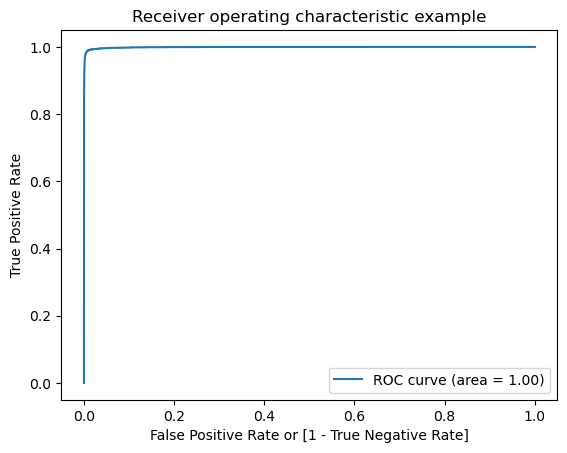

In [242]:
# ROC Curve for Train set
get_roc(X_train,y_train)

ROC for the test dataset: 99.6%


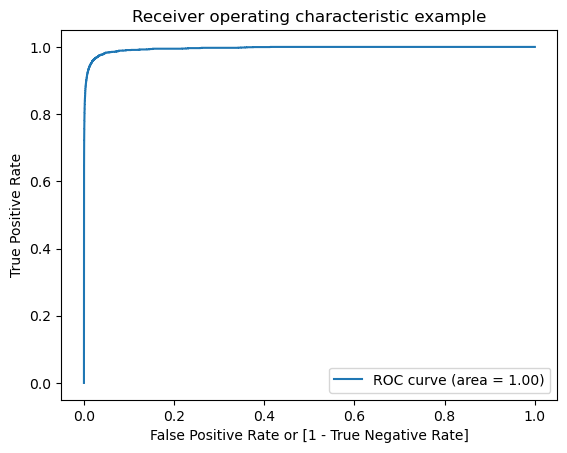

In [244]:
#ROC curve for test set
get_roc(x_test,y_test)

### Random Forest Model Hyperparameter tuning using ADASYN

In [294]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define the StratifiedKFold object
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=8)

# Initialize the list to store accuracy scores
acc_scores = []
prec_scores = []
rec_scores = []
f1_scores = []
conf_matrices = []

# Define the oversampling method
adasyn = ADASYN(random_state=8)

# Perform stratified K-fold cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Apply SMOTE to the training data only
    X_train_oversampled, y_train_oversampled = adasyn.fit_resample(X_train_fold, y_train_fold)

    # Train the model using the specified parameters
    rf_model = RandomForestClassifier(max_depth=30, n_estimators=300, min_samples_split=2, min_samples_leaf=1, n_jobs=-1, random_state=8)
    rf_model.fit(X_train_oversampled, y_train_oversampled)

    # Make predictions
    pred_values = rf_model.predict(X_val_fold)

    # Calculate and print the scores
    acc_scores.append(accuracy_score(y_val_fold, pred_values))
    prec_scores.append(precision_score(y_val_fold, pred_values, average='weighted'))
    rec_scores.append(recall_score(y_val_fold, pred_values, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, pred_values, average='weighted'))

    # Calculate confusion matrix and append it to conf_matrices
    conf_matrix = confusion_matrix(y_val_fold, pred_values)
    conf_matrices.append(conf_matrix)

# Print the accuracy of each fold
print('Accuracy of each fold: {}'.format(acc_scores))

# Print the average accuracy
print('Average accuracy: {}'.format(np.mean(acc_scores)))
print('Precision Score: {}'.format(np.mean(prec_scores)))
print('Recall Score: {}'.format(np.mean(rec_scores)))
print('F1 Score: {}'.format(np.mean(f1_scores)))

# Print confusion matrices
for conf_matrix in conf_matrices:
    tn, fp, fn, tp = conf_matrix.ravel()
    print('False positive rate: ', (fp/float(tn+fp)))
    print('Positive predictive value: ', (tp / float(tp+fp)))
    print('Negative predictive value: ', (tn / float(tn+fn)))
    print("\n")


Accuracy of each fold: [0.9979177546123388, 0.9979970716261729, 0.9979441890288442]
Average accuracy: 0.9979530050891187
Precision Score: 0.9979119437337466
Recall Score: 0.9979530050891187
F1 Score: 0.9979299231024096
False positive rate:  0.0008975854950184005
Positive predictive value:  0.8374473208910295
Negative predictive value:  0.9988035773038615


False positive rate:  0.0009175348895966171
Positive predictive value:  0.8373600471420153
Negative predictive value:  0.9989031443196171


False positive rate:  0.00088761527363151
Positive predictive value:  0.8394467829224294
Negative predictive value:  0.9988201825227488




In [295]:
train_pred_values = rf_model.predict(X_train)
test_pred_values = rf_model.predict(x_test)

In [296]:
get_metrics(y_train,train_pred_values,y_test,test_pred_values)

Train Accuracy : 0.9992287963052733
Train Confusion Matrix: [[902074    345]
 [   355   4898]]
Train Confusion Matrix data  tn:--  902074 fp:--  345 fn:--  355 tp:--  4898
F1 Train score:  0.9333079268292682
Train Recall:  0.9324195697696555
Train Precision:  0.9341979782567232

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    902419
           1       0.93      0.93      0.93      5253

    accuracy                           1.00    907672
   macro avg       0.97      0.97      0.97    907672
weighted avg       1.00      1.00      1.00    907672

--------------------------------------------------
Test Accuracy : 0.9980102981210942
Train Confusion Matrix: [[386411    339]
 [   435   1818]]
Test Confusion Matrix data  tn:--  386411 fp:--  339 fn:--  435 tp:--  1818
Test F1 score:  0.8244897959183674
Test Recall:  0.8069241011984021
Test Precision:  0.8428372739916551

 clasification report:
               preci

ROC for the test dataset: 99.9%


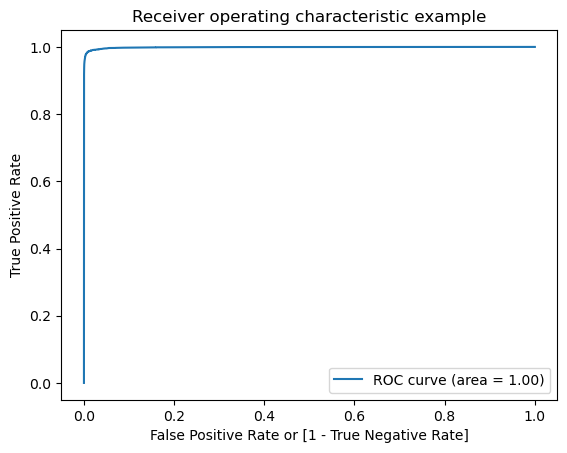

In [299]:
# ROC Curve for Train set
get_roc(X_train,y_train)

ROC for the test dataset: 99.6%


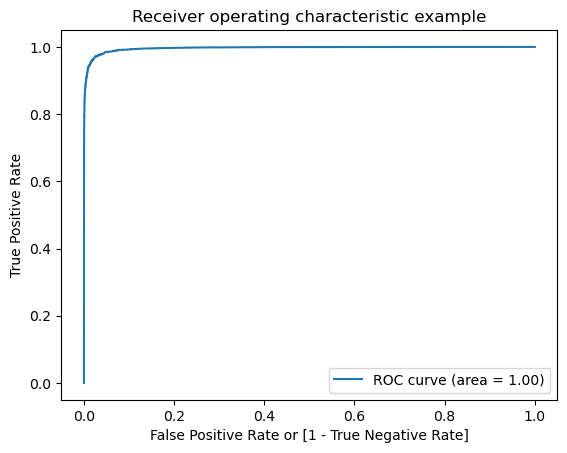

In [300]:
# ROC Curve for Test set
get_roc(x_test,y_test)

## Model Conclusion
Based on all the models that are executed Random Forest with Stratified K fold and ADASYN sampling results are better. Precison and Recall values of both train and test set are almost matching. 
finalizing this as the final Model.

## Cost Benefit Analysis -Part 2

In [301]:
# Average number of transactions per month detected as fraudulent by the model (TF)= TP+FP/24
# True Positives and False positives of Train and test set 
Avg_trans_per_month_by_model= (1806+329+4895+348)/18
Avg_trans_per_month_by_model

409.8888888888889

In [302]:
# Total cost of providing customer support per month for fraudulent transactions detected by the model(TF*$1.5)
total_cost_per_month = Avg_trans_per_month_by_model*1.5
total_cost_per_month

614.8333333333334

In [303]:
# Average number of transactions per month that are fraudulent but not detected by the model (FN)
# False negatives from train set and test set 

Avg_fraud_tran_not_detected= (447+358)/18
Avg_fraud_tran_not_detected

44.72222222222222

In [304]:
# Cost incurred due to fraudulent transactions left undetected by the model (FN*c)

cost_incurred_false_negatives= Avg_fraud_tran_not_detected * 531
cost_incurred_false_negatives

23747.5

In [305]:
# Cost incurred per month after the model is built and deployed (4+6)

Cost_incurred_after_model =total_cost_per_month+cost_incurred_false_negatives
Cost_incurred_after_model

24362.333333333332

In [306]:
# Cost incured due to fradulent transactions not detected during Model building 
Cost_incurred_before_model = Avg_fraud_trans_per_month * 531
Cost_incurred_before_model

221427.0

In [307]:
# Final savings = Cost incurred before - Cost incurred after(1-7)
final_savings = Cost_incurred_before_model - Cost_incurred_after_model
final_savings

197064.66666666666

### Importing test set

In [310]:
# Reading the test set
df_test = pd.read_csv("C:\\Users\\Abhishek Kare\\Downloads\\archive (2)\\fraudTest.csv")
# df_test = pd.read_csv("fraudTest.csv")

In [311]:
# Dropping irrelevant columns
df_test.drop(['Unnamed: 0','first','last','trans_num'], axis=1, inplace=True)

In [312]:
df_test

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,1388534364,44.470525,-117.080888,0


In [313]:
# Segregating state into respective regions
df_test['Region'] = df_test.apply(lambda row: Group_Region(row), axis=1)

In [314]:
df_test.is_fraud.value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [315]:
# Converting dob to datetime
df_test['dob'] = pd.to_datetime(df_test['dob'])
df_test['dob']

0        1968-03-19
1        1990-01-17
2        1970-10-21
3        1987-07-25
4        1955-07-06
            ...    
555714   1966-02-13
555715   1999-12-27
555716   1981-11-29
555717   1965-12-15
555718   1993-05-10
Name: dob, Length: 555719, dtype: datetime64[ns]

In [316]:
# Derive Age from the Date of Birth
df_test["age"] = df_test["dob"].apply(lambda x : (pd.datetime.now().year - x.year))

# Dropping dob column
df_test.drop('dob', axis=1, inplace=True)

In [317]:
# Converting trans_date_trans_time to datetime
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['trans_date_trans_time']

0        2020-06-21 12:14:25
1        2020-06-21 12:14:33
2        2020-06-21 12:14:53
3        2020-06-21 12:15:15
4        2020-06-21 12:15:17
                 ...        
555714   2020-12-31 23:59:07
555715   2020-12-31 23:59:09
555716   2020-12-31 23:59:15
555717   2020-12-31 23:59:24
555718   2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 555719, dtype: datetime64[ns]

In [318]:
# split the date and time from the transaction date time column

df_test['trans_date']=df_test.trans_date_trans_time.dt.date

df_test['trans_hour']=df_test.trans_date_trans_time.dt.hour

df_test['trans_min']=df_test.trans_date_trans_time.dt.minute

df_test['trans_year_month'] = df_test.trans_date_trans_time.dt.to_period('M')

df_test['weekday'] = df_test.trans_date_trans_time.dt.dayofweek

df_test['trans_date']= pd.to_datetime(df_test['trans_date'], format='%Y-%m-%d')

In [319]:
# derive the year of and month if the year of the transactions
df_test['trans_year']=df_test.trans_date_trans_time.dt.year
df_test['trans_month'] = df_test.trans_date_trans_time.dt.month

In [320]:
# Calculate the average transaction amount for each customer
df_test['avg_trans_amt'] = df_test.groupby('cc_num')['amt'].transform('mean')

In [321]:
# Calculate the frequency of transactions for each customer
df_test['trans_freq'] = df_test.groupby('cc_num')['cc_num'].transform('count')

In [322]:
# Time since last transaction of the customer
df_test.sort_values(by='trans_date_trans_time', inplace=True)
df_test['time_since_last_trans'] = df_test.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds()

In [323]:
# Deviation of customers' transaction from their average amount transactions
df_test['amt_deviation'] = df_test.groupby('cc_num')['amt'].transform(lambda x: abs(x - x.mean()))

In [324]:
# Change of customers' merchant
df_test['merchant_diversity'] = df_test.groupby('cc_num')['merchant'].transform(lambda x: x.nunique())

In [325]:
# Distance from usual transaction
df_test['usual_lat'] = df_test.groupby('cc_num')['merch_lat'].transform('mean')
df_test['usual_long'] = df_test.groupby('cc_num')['merch_long'].transform('mean')
df_test['trans_distance'] = ((df_test['merch_lat'] - df_test['usual_lat'])**2 + (df_test['merch_long'] - df_test['usual_long'])**2)**0.5

In [326]:
# Set 'trans_date_trans_time' as the index
df_test.set_index('trans_date_trans_time', inplace=True)

# Calculate the rolling transaction frequency for each customer
df_test['rolling_trans_freq'] = df_test.groupby('cc_num')['cc_num'].rolling('1H').count().values

In [327]:
df_test['trans_freq_deviation'] = df_test.groupby('cc_num')['rolling_trans_freq'].transform(lambda x: abs(x - x.mean()))

In [328]:
df_test.reset_index(inplace=True)

In [329]:
# Dropping trans_date_trans_time and other columns
df_test.drop(['trans_date_trans_time'], axis=1, inplace=True)

In [330]:
df_test

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,Region,age,trans_date,trans_hour,trans_min,trans_year_month,weekday,trans_year,trans_month,avg_trans_amt,trans_freq,time_since_last_trans,amt_deviation,merchant_diversity,usual_lat,usual_long,trans_distance,rolling_trans_freq,trans_freq_deviation
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0,South,56,2020-06-21,12,14,2020-06,6,2020,6,61.893062,640,NaN,59.033062,394,33.998679,-80.929068,0.271924,1.0,0.207812
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0,West,34,2020-06-21,12,14,2020-06,6,2020,6,53.596523,837,NaN,23.756523,462,40.333271,-110.467313,1.017948,1.0,0.232975
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0,Northeast,54,2020-06-21,12,14,2020-06,6,2020,6,83.053812,1073,NaN,41.773812,520,40.671462,-73.536433,0.682662,1.0,0.196645
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0,South,37,2020-06-21,12,15,2020-06,6,2020,6,59.207526,663,NaN,0.842474,422,28.576375,-80.846158,0.238891,1.0,0.241327
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0,Midwest,69,2020-06-21,12,15,2020-06,6,2020,6,55.274501,891,NaN,52.084501,469,44.250821,-85.011321,1.124534,1.0,0.236813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0,Midwest,58,2020-12-31,23,59,2020-12,3,2020,12,72.595446,628,16630.0,28.825446,396,40.502087,-91.853983,0.761171,1.0,0.214968
555715,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0,West,25,2020-12-31,23,59,2020-12,3,2020,12,46.529792,1105,9743.0,65.310208,523,29.027145,-95.425325,0.990669,1.0,0.226244
555716,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0,West,43,2020-12-31,23,59,2020-12,3,2020,12,92.682790,1079,724.0,5.802790,524,46.207722,-118.890474,0.939675,1.0,0.223355
555717,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0,West,59,2020-12-31,23,59,2020-12,3,2020,12,58.129411,883,12025.0,50.139411,464,44.638754,-116.467376,0.636159,2.0,0.780294


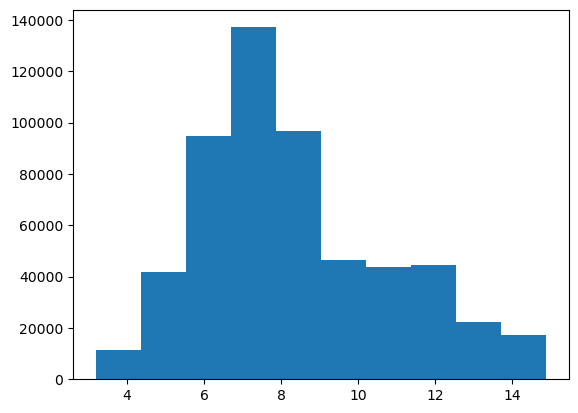

In [331]:
# Power transforming the highly skewed columns
df_test.city_pop= np.log1p(df_test.city_pop)
plt.hist(df_test.city_pop)
plt.show()

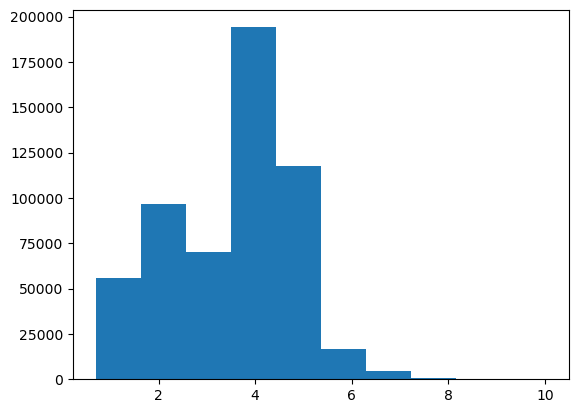

In [332]:
# Power transforming the highly skewed columns
df_test.amt= np.log1p(df_test.amt)
plt.hist(df_test.amt)
plt.show()

In [333]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_features = ['merchant', 'category', 'gender', 'street', 'city', 'state', 'job']
for feature in categorical_features:
    df_test[feature] = le.fit_transform(df_test[feature])

In [334]:
# Creating dummy variables
dummy_df = pd.get_dummies(df_test[['Region']], drop_first=True)
dummy_df

,Region_Northeast,Region_South,Region_West
0,0,1,0
1,0,0,1
2,1,0,0
3,0,1,0
4,0,0,0
...,...,...,...
555714,0,0,0
555715,0,0,1
555716,0,0,1
555717,0,0,1


In [335]:
# Joining the test df and dummy variables
df_test = pd.concat([df_test, dummy_df], axis=1)
df_test

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,Region,age,trans_date,trans_hour,trans_min,trans_year_month,weekday,trans_year,trans_month,avg_trans_amt,trans_freq,time_since_last_trans,amt_deviation,merchant_diversity,usual_lat,usual_long,trans_distance,rolling_trans_freq,trans_freq_deviation,Region_Northeast,Region_South,Region_West
0,2291163933867244,319,10,1.350667,1,341,157,39,29209,33.9659,-80.9355,12.717392,275,1371816865,33.986391,-81.200714,0,South,56,2020-06-21,12,14,2020-06,6,2020,6,61.893062,640,NaN,59.033062,394,33.998679,-80.929068,0.271924,1.0,0.207812,0,1,0
1,3573030041201292,591,10,3.428813,0,354,16,43,84002,40.3207,-110.4360,5.713733,392,1371816873,39.450498,-109.960431,0,West,34,2020-06-21,12,14,2020-06,6,2020,6,53.596523,837,NaN,23.756523,462,40.333271,-110.467313,1.017948,1.0,0.232975,0,0,1
2,3598215285024754,611,5,3.744314,0,865,61,33,11710,40.6729,-73.5365,10.448628,259,1371816893,40.495810,-74.196111,0,Northeast,54,2020-06-21,12,14,2020-06,6,2020,6,83.053812,1073,NaN,41.773812,520,40.671462,-73.536433,0.682662,1.0,0.196645,1,0,0
3,3591919803438423,222,9,4.111693,1,320,764,8,32780,28.5697,-80.8191,10.910861,407,1371816915,28.812398,-80.883061,0,South,37,2020-06-21,12,15,2020-06,6,2020,6,59.207526,663,NaN,0.842474,422,28.576375,-80.846158,0.238891,1.0,0.241327,0,1,0
4,3526826139003047,292,13,1.432701,1,548,247,21,49632,44.2529,-85.0170,7.027315,196,1371816917,44.959148,-85.884734,0,Midwest,69,2020-06-21,12,15,2020-06,6,2020,6,55.274501,891,NaN,52.084501,469,44.250821,-85.011321,1.124534,1.0,0.236813,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,3.801538,1,531,443,23,63453,40.4931,-91.8912,6.253829,460,1388534347,39.946837,-91.333331,0,Midwest,58,2020-12-31,23,59,2020-12,3,2020,12,72.595446,628,16630.0,28.825446,396,40.502087,-91.853983,0.761171,1.0,0.214968,0,0,0
555715,3556613125071656,264,7,4.725971,1,540,401,42,77566,29.0393,-95.4401,10.266045,198,1388534349,29.661049,-96.186633,0,West,25,2020-12-31,23,59,2020-12,3,2020,12,46.529792,1105,9743.0,65.310208,523,29.027145,-95.425325,0.990669,1.0,0.226244,0,0,1
555716,6011724471098086,496,7,4.475972,0,126,104,46,99323,46.1966,-118.9017,8.212026,294,1388534355,46.658340,-119.715054,0,West,43,2020-12-31,23,59,2020-12,3,2020,12,92.682790,1079,724.0,5.802790,524,46.207722,-118.890474,0.939675,1.0,0.223355,0,0,1
555717,4079773899158,75,13,2.196113,1,663,476,12,83643,44.6255,-116.4493,4.867534,58,1388534364,44.470525,-117.080888,0,West,59,2020-12-31,23,59,2020-12,3,2020,12,58.129411,883,12025.0,50.139411,464,44.638754,-116.467376,0.636159,2.0,0.780294,0,0,1


In [336]:
# Dropping irrelevant columns
df_test.drop(['Region'], axis=1, inplace=True)

In [337]:
# Dropping unnecessaty columns
df_test.drop(['trans_date', 'cc_num', 'zip', 'trans_year_month', 'merch_lat', 'merch_long', 'usual_lat', 'usual_long', 'lat', 'long'], axis=1, inplace=True)

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   merchant               1296675 non-null  int32  
 1   category               1296675 non-null  int32  
 2   amt                    1296675 non-null  float64
 3   gender                 1296675 non-null  int32  
 4   street                 1296675 non-null  int32  
 5   city                   1296675 non-null  int32  
 6   state                  1296675 non-null  int32  
 7   city_pop               1296675 non-null  float64
 8   job                    1296675 non-null  int32  
 9   unix_time              1296675 non-null  int64  
 10  is_fraud               1296675 non-null  int64  
 11  age                    1296675 non-null  int64  
 12  trans_hour             1296675 non-null  int64  
 13  trans_min              1296675 non-null  int64  
 14  weekday           

In [339]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   merchant               555719 non-null  int32  
 1   category               555719 non-null  int32  
 2   amt                    555719 non-null  float64
 3   gender                 555719 non-null  int32  
 4   street                 555719 non-null  int32  
 5   city                   555719 non-null  int32  
 6   state                  555719 non-null  int32  
 7   city_pop               555719 non-null  float64
 8   job                    555719 non-null  int32  
 9   unix_time              555719 non-null  int64  
 10  is_fraud               555719 non-null  int64  
 11  age                    555719 non-null  int64  
 12  trans_hour             555719 non-null  int64  
 13  trans_min              555719 non-null  int64  
 14  weekday                555719 non-nu

In [340]:
# List of column names in the order of the first DataFrame
column_order = ['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state', 'city_pop', 'job', 'unix_time', 'is_fraud', 'age', 'trans_hour', 'trans_min', 'weekday', 'trans_year', 'trans_month', 'avg_trans_amt', 'trans_freq', 'time_since_last_trans', 'amt_deviation', 'rolling_trans_freq', 'trans_freq_deviation', 'merchant_diversity', 'trans_distance', 'Region_Northeast', 'Region_South', 'Region_West']

df_test = df_test[column_order]


In [341]:
# Replacing null values in time_since_last_trans
df_test.time_since_last_trans.fillna(0, inplace=True)

In [342]:
# Getting all the numeric columns
num_vars = list(df_test.columns)
num_vars.remove('is_fraud')

In [343]:
# Fit transforming the numeric columns
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,merchant,category,amt,gender,street,city,state,city_pop,job,unix_time,is_fraud,age,trans_hour,trans_min,weekday,trans_year,trans_month,avg_trans_amt,trans_freq,time_since_last_trans,amt_deviation,rolling_trans_freq,trans_freq_deviation,merchant_diversity,trans_distance,Region_Northeast,Region_South,Region_West
0,-0.118801,0.963181,-1.692010,1.099020,-0.524598,-1.114532,0.860572,1.776644,23.916386,1.757293,0,0.302625,-0.117722,-0.895036,1.332318,1.57585,-0.041436,-0.439660,-1.586619,-0.684813,0.014821,-0.410682,0.207812,-2.087046,-1.732615,-0.482548,1.496194,-0.533182
1,1.234552,0.963181,-0.080960,-0.909901,-0.478170,-1.659805,1.139864,-1.080718,35.036411,1.757294,0,-0.963219,-0.117722,-0.895036,1.332318,1.57585,-0.041436,-0.870850,-1.321346,-0.684813,-0.213513,-0.410682,0.232975,-1.326424,0.886476,-0.482548,-0.668362,1.875533
2,1.334063,-0.314785,0.163628,-0.909901,1.346823,-1.485782,0.441636,0.851030,22.395699,1.757296,0,0.187549,-0.117722,-0.895036,1.332318,1.57585,-0.041436,0.660112,-1.003556,-0.684813,-0.096893,-0.410682,0.196645,-0.677659,-0.290621,2.072331,-0.668362,-0.533182
3,-0.601431,0.707588,0.448433,1.099020,-0.599598,1.232847,-1.303934,1.039613,36.462055,1.757297,0,-0.790604,-0.117722,-0.837323,1.332318,1.57585,-0.041436,-0.579233,-1.555648,-0.684813,-0.361828,-0.410682,0.241327,-1.773849,-1.848585,-0.482548,1.496194,-0.533182
4,-0.253141,1.729961,-1.628415,1.099020,0.214685,-0.766486,-0.396238,-0.544801,16.407993,1.757297,0,1.050624,-0.117722,-0.837323,1.332318,1.57585,-0.041436,-0.783641,-1.248631,-0.684813,-0.030155,-0.410682,0.236813,-1.248125,1.260671,-0.482548,-0.668362,-0.533182


In [344]:
# Deriving x_new_test
X_new_test = df_test.drop('is_fraud', axis=1)

# Make predictions on the new test set
new_pred_values = rf_model.predict(X_new_test)

# Now new_pred_values contains the predicted values for new test set
print(new_pred_values)


[0 0 0 ... 0 0 0]


In [345]:
# Deriving y_new_test

y_new_test = df_test['is_fraud']

In [346]:
# Calculate accuracy score
new_acc_score = accuracy_score(y_new_test, new_pred_values)
print('Accuracy Score:', new_acc_score)

# Calculate precision score
new_prec_score = precision_score(y_new_test, new_pred_values, average='weighted')
print('Precision Score:', new_prec_score)

# Calculate recall score
new_rec_score = recall_score(y_new_test, new_pred_values, average='weighted')
print('Recall Score:', new_rec_score)

# Calculate F1 score
new_f1_score = f1_score(y_new_test, new_pred_values, average='weighted')
print('F1 Score:', new_f1_score)

# Calculate confusion matrix
new_conf_matrix = confusion_matrix(y_new_test, new_pred_values)
print('Confusion Matrix:\n', new_conf_matrix)

# Calculate metrics from confusion matrix
tn, fp, fn, tp = new_conf_matrix.ravel()
print('False positive rate: ', (fp/float(tn+fp)))
print('Positive predictive value: ', (tp / float(tp+fp)))
print('Negative predictive value: ', (tn / float(tn+fn)))


Accuracy Score: 0.9981393474039938
Precision Score: 0.9980486215111205
Recall Score: 0.9981393474039938
F1 Score: 0.9980834476896504
Confusion Matrix:
 [[553179    395]
 [   639   1506]]
False positive rate:  0.0007135450725648243
Positive predictive value:  0.7922146238821672
Negative predictive value:  0.9988461913480602


## Conclusion

## Model Result and Performance

- Model performance on training set:
    - **Average accuracy**: 0.9979
    - **Precision Score**:  0.9978
    - **Recall Score**: 0.9979
    - **F1 Score**: 0.9978
    - **False positive rate**:  0.0008
    - **Positive predictive value**:  0.8374
    - **Negative predictive value**:  0.9988
    
<br>

- Model performance on test set:
    - **Accuracy Score:** 0.9981
    - **Precision Score:** 0.9980
    - **Recall Score:** 0.9981
    - **F-1 Score:** 0.9980
    - **False positive rate**: 0.0007
    - **Positive predictive value**: 0.7922
    - **Negative predictive value**:  0.9988

## Important Features

In [347]:
# Get feature importances
importances = rf_model.feature_importances_

# Convert the importances into a DataFrame
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values('Importance', ascending=False)

# Print the DataFrame
print(importances_df)


                  Feature  Importance
19          amt_deviation    0.273606
2                     amt    0.229581
11             trans_hour    0.130530
1                category    0.097040
17             trans_freq    0.041036
13                weekday    0.030425
18  time_since_last_trans    0.027360
22     merchant_diversity    0.026379
10                    age    0.015742
16          avg_trans_amt    0.015737
3                  gender    0.011374
9               unix_time    0.010689
7                city_pop    0.010600
15            trans_month    0.010305
8                     job    0.009296
4                  street    0.008589
12              trans_min    0.008378
5                    city    0.008069
6                   state    0.008008
20     rolling_trans_freq    0.007974
0                merchant    0.007539
23         trans_distance    0.005519
25           Region_South    0.001901
26            Region_West    0.001769
24       Region_Northeast    0.001435
14          

### Key Features
<br>

- **amt_deviation** (Amount Deviation) and **amt** are the  most important feature, with an importance score of approximately 0.25 and 0.22. This indicates that the deviation of a transaction amount from the norm is a strong indicator of fraud.

<br>

- **Trans hour** and **category**  are also among the top influential features.

<br>

- Other features such as regions, trans_year, job, street did not contribute much towards the detection of fraud transactions.
